# INTRODUCTION  (AS MENTIONED ON UPGRAD PORTAL )

This case study aims to give you an idea of applying EDA in a real business scenario. In this case study, apart from applying the techniques that you have learnt in the EDA module, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

 

# UNDERSTANDING RELATED TO BUSINESS 

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

 

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

 

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

All other cases: All other cases when the payment is paid on time.

 

 

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

Approved: The Company has approved loan Application

Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.

Refused: The company had rejected the loan (because the client does not meet their requirements etc.).

Unused offer:  Loan has been cancelled by the client but on different stages of the process.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

# BUSINESS OBJECTIVES

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough).

# DATA UNDERSTANDING

1. 'application_data.csv'  contains all the information of the client at the time of application.
The data is about whether a client has payment difficulties.
2. 'previous_application.csv' contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.
3. 'columns_description.csv' is data dictionary which describes the meaning of the variables.

# RESULT EXPECTED BY AKHILESH PRASAD AND RIDHAM SHAH 

1. Present the overall approach of the analysis in a presentation. Mention the problem statement and the analysis approach briefly.

2. Identify the missing data and use appropriate method to deal with it. (Remove columns/or replace it with an appropriate value)

3. Identify if there are outliers in the dataset. Also, mention why do you think it is an outlier. Again, remember that for this exercise, it is not necessary to remove any data points.

4. Identify if there is data imbalance in the data. Find the ratio of data imbalance.

5. Explain the results of univariate, segmented univariate, bivariate analysis, etc. in business terms.

6. Find the top 10 correlation for the Client with payment difficulties and all other cases (Target variable). Note that you have to find the top correlation by segmenting the data frame w.r.t to the target variable and then find the top correlation for each of the segmented data and find if any insight is there.  Say, there are 5+1(target) variables in a dataset: Var1, Var2, Var3, Var4, Var5, Target. And if you have to find top 3 correlation, it can be: Var1 & Var2, Var2 & Var3, Var1 & Var3. Target variable will not feature in this correlation as it is a categorical variable and not a continuous variable which is increasing or decreasing.  

7. Include visualisations and summarise the most important results in the presentation. You are free to choose the graphs which explain the numerical/categorical variables. Insights should explain why the variable is important for differentiating the clients with payment difficulties with all other cases. 

##### IMPORTING ALL THE LIBRARIES NEED TO DO EDA 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#importing warnings 

import warnings
warnings.filterwarnings("ignore")


In [3]:
#notebook setting to display all rows and coloumns 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)


# DATASET- 1 (application_data.csv)

### 1. Reading and understanding the data

### 1.1 Importing the dataset

In [4]:
#importing the application_data.csv file
import pandas as pd
app_data = pd.read_csv("application_data.csv")

In [5]:
#checking the rows and coloumns of the raw dataset

app_data.shape

(307511, 122)

In [6]:
#checking info of all data sets

app_data.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [8]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [9]:
#checking the numeric variables in dataset

app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

# Insights


1. There are 122 coloumns and 307511 rows.
2. There columns having negative, positive which includes days so fixing is much required
3. There are some columns with very hight values, columns related to Amount(prices), So standardising is required, will perform these taks later in notebook 

# 2. Data Cleaning & Manipulation 

### 2.1 Null values

In [10]:
# checking how many null values present in each of the columns

#create a function to find the null values for the dataframe
def null_values(df):
    return round((df.isnull().sum()*100/len(df)).sort_values(ascending = False),2)

In [11]:
null_values(app_data)

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAPARTMENTS_MEDI        69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
LIVINGAPARTMENTS_MEDI           68.35
FLOORSMIN_AVG                   67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_MEDI                  67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_MODE                66.50
YEARS_BUILD_AVG                 66.50
OWN_CAR_AGE                     65.99
LANDAREA_MEDI                   59.38
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MODE              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

### 2.1.1 Dealing with Null values more than 50%

In [12]:
#creating a variable null_col_50 for storing null columns having missing values more than 50%

null_col_50 = null_values(app_data)[null_values(app_data)>50]

In [13]:
#printing null_values more than 50%
print(null_col_50)
print()
print("Num of columns having missing values more than 50% :", len(null_col_50))

COMMONAREA_MEDI             69.87
COMMONAREA_AVG              69.87
COMMONAREA_MODE             69.87
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAPARTMENTS_AVG     69.43
NONLIVINGAPARTMENTS_MEDI    69.43
FONDKAPREMONT_MODE          68.39
LIVINGAPARTMENTS_MODE       68.35
LIVINGAPARTMENTS_AVG        68.35
LIVINGAPARTMENTS_MEDI       68.35
FLOORSMIN_AVG               67.85
FLOORSMIN_MODE              67.85
FLOORSMIN_MEDI              67.85
YEARS_BUILD_MEDI            66.50
YEARS_BUILD_MODE            66.50
YEARS_BUILD_AVG             66.50
OWN_CAR_AGE                 65.99
LANDAREA_MEDI               59.38
LANDAREA_MODE               59.38
LANDAREA_AVG                59.38
BASEMENTAREA_MEDI           58.52
BASEMENTAREA_AVG            58.52
BASEMENTAREA_MODE           58.52
EXT_SOURCE_1                56.38
NONLIVINGAREA_MODE          55.18
NONLIVINGAREA_AVG           55.18
NONLIVINGAREA_MEDI          55.18
ELEVATORS_MEDI              53.30
ELEVATORS_AVG               53.30
ELEVATORS_MODE

##### INSIGHTS

1. There are 41 columns having null values more than 50% which is related to different area of loan applicant living place 

In [14]:
null_col_50.index  #now drop all these columns for better insights and for better EDA 

Index(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI', 'FLOORSMIN_AVG', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE', 'YEARS_BUILD_AVG', 'OWN_CAR_AGE', 'LANDAREA_MEDI', 'LANDAREA_MODE', 'LANDAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'ELEVATORS_MEDI', 'ELEVATORS_AVG', 'ELEVATORS_MODE', 'WALLSMATERIAL_MODE', 'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'APARTMENTS_MODE', 'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE', 'LIVINGAREA_AVG', 'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'HOUSETYPE_MODE'], dtype='object')

In [15]:
#Lets drop all the columns having missing values more than 50% which is in total 41 columns

app_data.drop(columns = null_col_50.index, inplace = True)

In [16]:
app_data.shape #now we have only 81 columns remaining 

(307511, 81)

### 2.1.2 Dealing with null values more than 15%

In [17]:
#lets deal with null values more than 15%

null_col_15 = null_values(app_data)[null_values(app_data)>15]

In [18]:
null_col_15

FLOORSMAX_AVG                   49.76
FLOORSMAX_MODE                  49.76
FLOORSMAX_MEDI                  49.76
YEARS_BEGINEXPLUATATION_AVG     48.78
YEARS_BEGINEXPLUATATION_MODE    48.78
YEARS_BEGINEXPLUATATION_MEDI    48.78
TOTALAREA_MODE                  48.27
EMERGENCYSTATE_MODE             47.40
OCCUPATION_TYPE                 31.35
EXT_SOURCE_3                    19.83
dtype: float64

1. from the columns we can conclude that only 'OCCUPATION_TYPE' & 'EXT_SOURCE_3' looks relevant to TARGET columns, that's why dropping all columns except these 2.  

In [19]:
#removing 'OCCUPATION_TYPE' & 'EXT_SOURCE_3' from null_col_15 so that will remain 

null_col_15.drop(["OCCUPATION_TYPE","EXT_SOURCE_3"], inplace = True)

In [20]:
print(null_col_15)
print()
print("Num of columns more than 15% and are not relevant: ", len(null_col_15))

FLOORSMAX_AVG                   49.76
FLOORSMAX_MODE                  49.76
FLOORSMAX_MEDI                  49.76
YEARS_BEGINEXPLUATATION_AVG     48.78
YEARS_BEGINEXPLUATATION_MODE    48.78
YEARS_BEGINEXPLUATATION_MEDI    48.78
TOTALAREA_MODE                  48.27
EMERGENCYSTATE_MODE             47.40
dtype: float64

Num of columns more than 15% and are not relevant:  8


No of columns having missing values more than 15% and which are not relevant are 8 such columns

In [21]:
#thus removing them 

app_data.drop(null_col_15.index, axis=1, inplace = True)

In [22]:
app_data.shape #after droping or removing those 8 unrelevant columns we have now 73 columns left for better EDA

(307511, 73)

In [23]:
null_values(app_data).head(10)

OCCUPATION_TYPE               31.35
EXT_SOURCE_3                  19.83
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
NAME_TYPE_SUITE                0.42
OBS_30_CNT_SOCIAL_CIRCLE       0.33
dtype: float64

# 2.2 Analyse & Removing Unnecessary Columns

### 2.2.1 Starting with EXT_SOURCE_3, EXT_SOURCE_2. As they have normalised values, now we well understand the relation between these columns with TARGET columns using a heatmap

In [24]:
irrev = ["EXT_SOURCE_3", "EXT_SOURCE_2"] #putting iirelavant columns in variable irrev

Text(0.5, 1.0, 'Correlation between EXT_SOURCE_3, EXT_SOURCE_2, TARGET')

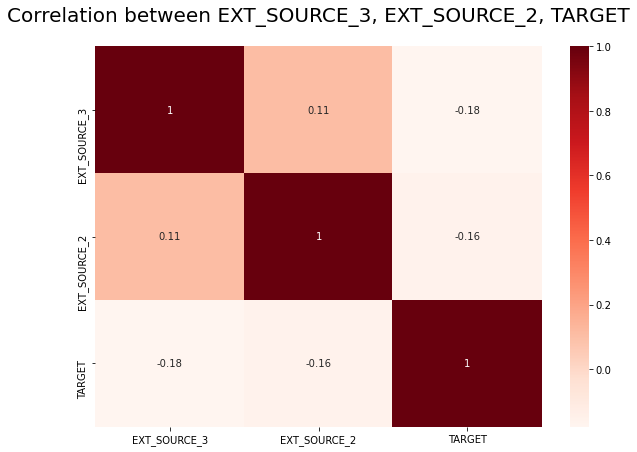

In [25]:
plt.figure(figsize = [10,7])

sns.heatmap(app_data[irrev+["TARGET"]].corr(), cmap = "Reds", annot =True)

plt.title("Correlation between EXT_SOURCE_3, EXT_SOURCE_2, TARGET", fontdict ={"fontsize":20}, pad = 25)

1. As you see in above fig there is no linear correlation and also from columns description we decided to remove these columns.
2. Also we are aware correlation doesn't cause causation

In [26]:
app_data.drop(irrev, axis=1, inplace = True)

In [27]:
app_data.shape

(307511, 71)

In [28]:
null_values(app_data)

OCCUPATION_TYPE                31.35
AMT_REQ_CREDIT_BUREAU_YEAR     13.50
AMT_REQ_CREDIT_BUREAU_QRT      13.50
AMT_REQ_CREDIT_BUREAU_MON      13.50
AMT_REQ_CREDIT_BUREAU_WEEK     13.50
AMT_REQ_CREDIT_BUREAU_DAY      13.50
AMT_REQ_CREDIT_BUREAU_HOUR     13.50
NAME_TYPE_SUITE                 0.42
DEF_30_CNT_SOCIAL_CIRCLE        0.33
OBS_60_CNT_SOCIAL_CIRCLE        0.33
DEF_60_CNT_SOCIAL_CIRCLE        0.33
OBS_30_CNT_SOCIAL_CIRCLE        0.33
AMT_GOODS_PRICE                 0.09
AMT_ANNUITY                     0.00
CNT_FAM_MEMBERS                 0.00
DAYS_LAST_PHONE_CHANGE          0.00
FLAG_DOCUMENT_8                 0.00
FLAG_DOCUMENT_2                 0.00
FLAG_DOCUMENT_3                 0.00
FLAG_DOCUMENT_4                 0.00
FLAG_DOCUMENT_5                 0.00
FLAG_DOCUMENT_6                 0.00
FLAG_DOCUMENT_7                 0.00
FLAG_DOCUMENT_12                0.00
FLAG_DOCUMENT_9                 0.00
FLAG_DOCUMENT_10                0.00
FLAG_DOCUMENT_11                0.00
L

### 2.2.2 Now we'll check columns with FLAGS and their relation with TARGET column to remove irrelavant ones 

For this we'll creating a dataframe containing all FLAG columns and then plot bar graphs for each column with respect to TARGET column for which "0" will represent as Repayer and "1" will represent as Defaulter

In [29]:
#adding all flag columns in variable "flag_col"

flag_col = [col for col in app_data.columns if "FLAG" in col ]

flag_col   #viewing all FLAG columns 

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [30]:
#creating flag_df dataframe having all FLAGS columns and TARGET column 

flag_df = app_data[flag_col+["TARGET"]]

In [31]:
#replacing  "0" as repayer and "1" as defaulter for TARGET column

flag_df["TARGET"] = flag_df["TARGET"].replace({1:"Defaulter", 0: "Repayer"})

In [32]:
#as stated in column description replacing "1" as Y being TRUE and "0" as N being False

for i in flag_df:
    if i!= "TARGET":
        flag_df[i] = flag_df[i].replace({1: "Y", 0: "N"})

In [33]:
flag_df.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
0,N,Y,Y,Y,N,Y,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Defaulter
1,N,N,Y,Y,N,Y,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Repayer
2,Y,Y,Y,Y,Y,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Repayer
3,N,Y,Y,Y,N,Y,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Repayer
4,N,Y,Y,Y,N,Y,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Repayer


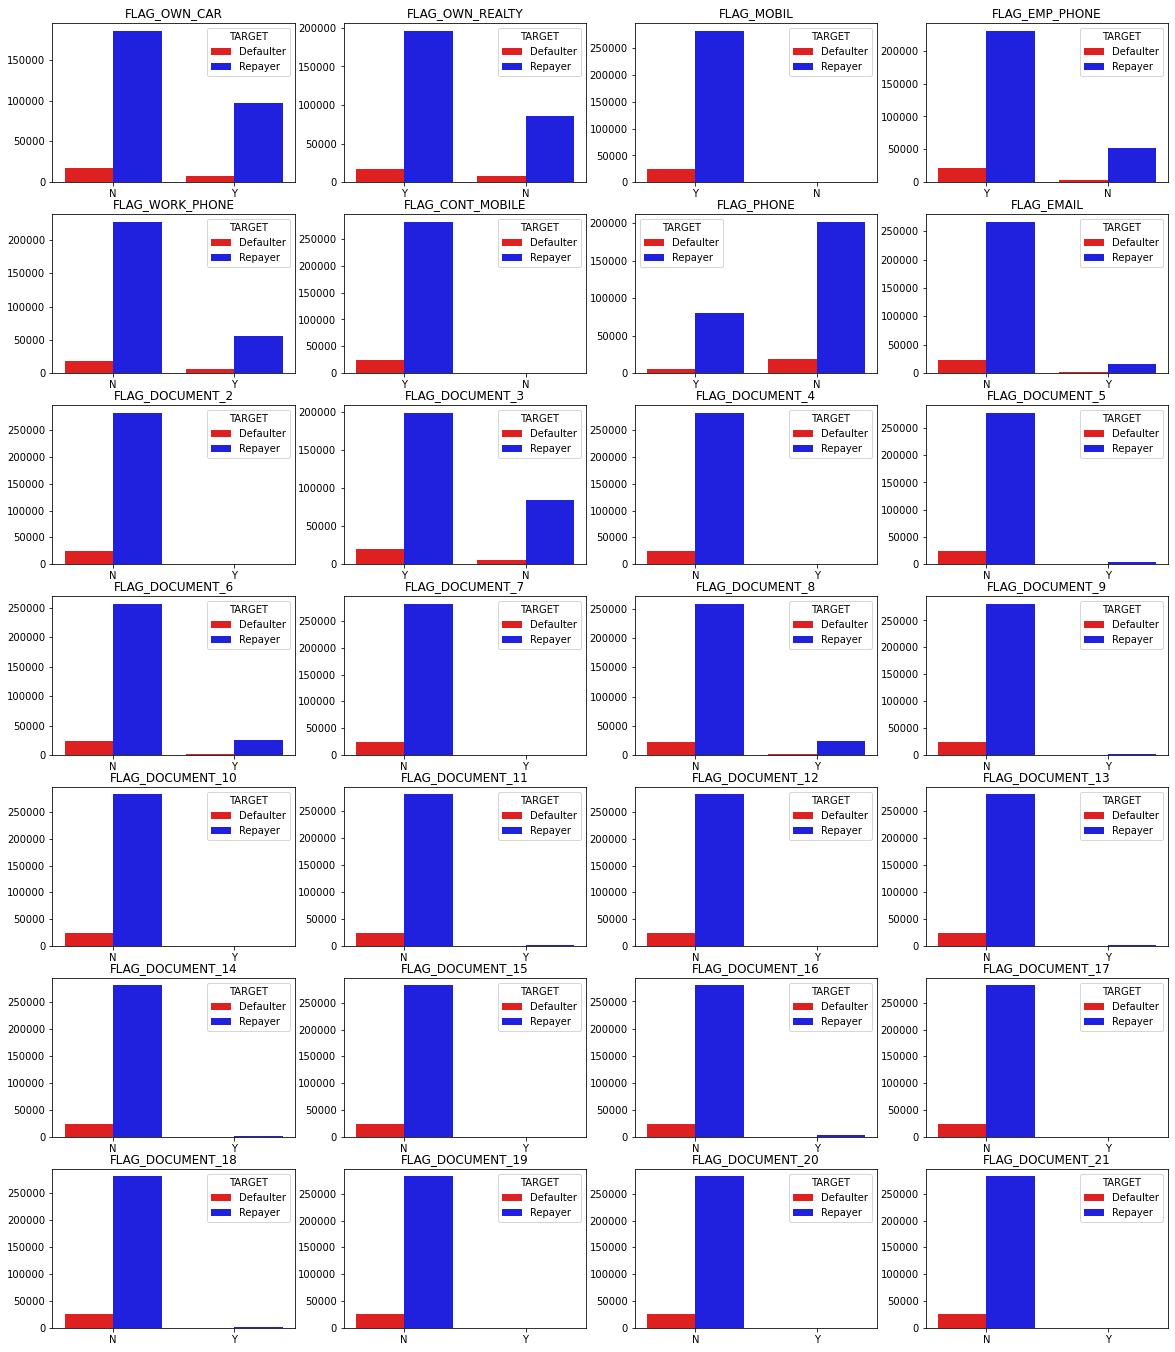

In [34]:
import itertools #for efficient looping plotting subplots

#plotting all the graph to find the relation and evaluting for dropping such columns 

plt.figure (figsize = [20,24])

for i,j in itertools.zip_longest(flag_col, range(len(flag_col))):
    plt.subplot(7,4, j+1)
    ax = sns.countplot(flag_df[i], hue = flag_df["TARGET"], palette = ["r","b"] )
    #plt.yticks(fontsize = 8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)
    

##### INSIGHTS

1. Columns (FLAG_OWN_REALTY, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_CONT_MOBBILE, FLAG_DOCUMENT_3) have more repayers than defaulter and from these keeping FLAG_DOCUMENT_3, FLAG_OWN_REALTY, FLAG_MOBIL more sense thus we can include these columns and remove all other FLAG columns and remove all other FLAG columns for further analysis

In [35]:
#removing required columns from "flag_df" such that we can remove the irrelevant columns from "app_data" dataset

flag_df.drop(["TARGET", "FLAG_OWN_REALTY", "FLAG_MOBIL", "FLAG_DOCUMENT_3"], axis=1, inplace=True)


In [36]:
len(flag_df.columns)

25

In [37]:
#dropping the columns of "flag_df" dataframe that is removing more than 25 columns from "app_data" dataframe

app_data.drop(flag_df.columns, axis=1, inplace=True)

In [38]:
app_data.shape
        

(307511, 46)

##### INSIGHTS

Now that we have removed all the unnecessary columns, we will proceed with imputing values for relevant missing columns wherever required

In [39]:
null_values(app_data).head(10)

OCCUPATION_TYPE               31.35
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
NAME_TYPE_SUITE                0.42
OBS_60_CNT_SOCIAL_CIRCLE       0.33
OBS_30_CNT_SOCIAL_CIRCLE       0.33
dtype: float64

##### INSIGHTS

1. Now we have only 7 columns which have missing values more than 1%. Thus, we will only impute them for further analysis and such columns are: OCCUPATION_TYPE, AMT_REQ_CREDIT_BUREAU_YEAR, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_HOUR 

### 3.1 Imputing for "OCCUPATION_TYPE" Column

In [40]:
#percentage of each category present in "OCCUPATION_TYPE"

app_data["OCCUPATION_TYPE"].value_counts(normalize=True)*100

Laborers                 26.139636
Sales staff              15.205570
Core staff               13.058924
Managers                 10.122679
Drivers                   8.811576
High skill tech staff     5.390299
Accountants               4.648067
Medicine staff            4.043672
Security staff            3.183498
Cooking staff             2.816408
Cleaning staff            2.203960
Private service staff     1.256158
Low-skill Laborers        0.991379
Waiters/barmen staff      0.638499
Secretaries               0.618132
Realty agents             0.355722
HR staff                  0.266673
IT staff                  0.249147
Name: OCCUPATION_TYPE, dtype: float64

##### INSIGHTS

From above it looks like this column is categorical one and have missing values of 31.35% to fix this we will impute another category as "Unknown" for the missing values

In [41]:
#imputing null values with "unknown"

app_data["OCCUPATION_TYPE"]= app_data["OCCUPATION_TYPE"].fillna("Unknown")


In [42]:
app_data["OCCUPATION_TYPE"].isnull().sum()  #Now we have zero null values



0

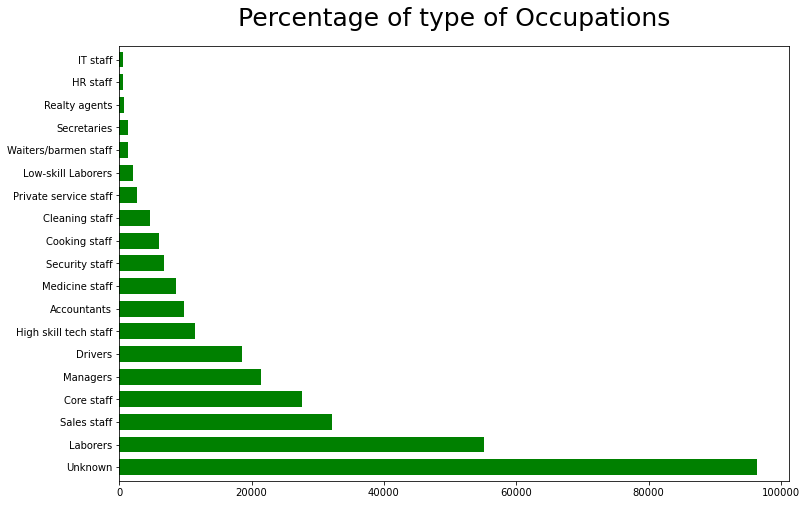

In [43]:
#Plotting a percentage graph having each cateogry of "OCCUPATION_TYPE"

plt.figure(figsize = [12,8])
(app_data["OCCUPATION_TYPE"].value_counts()).plot.barh(color= "green", width = .7)
plt.title("Percentage of type of Occupations", fontdict= {"fontsize": 25},pad= 20 )
plt.show()

Highest percentage of values belongs to unknown group and Secons belongs to laborers

### 3.2 let's move to other remaining 6  columns :


1. AMT_REQ_CREDIT_BUREAU_YEAR,
2. AMT_REQ_CREDIT_BUREAU_QRT,
3. AMT_REQ_CREDIT_BUREAU_MON,
4. AMT_REQ_CREDIT_BUREAU_WEEK, 
5. AMT_REQ_CREDIT_BUREAU_DAY,
6. AMT_REQ_CREDIT_BUREAU_HOUR

In [44]:
app_data[["AMT_REQ_CREDIT_BUREAU_YEAR", "AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR"]].describe()

,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,1.899974,0.265474,0.267395,0.034362,0.007000,0.006402
std,1.869295,0.794056,0.916002,0.204685,0.110757,0.083849
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,261.000000,27.000000,8.000000,9.000000,4.000000


These above columns represent number of enquires made for the customer (which should be discrete and not continous). From the above describe results we see that all values are numerical and can conclude that for imputing missing we should not use mean as it is in decimal form, hence for imputing purpose we will use median for all these columns.

In [45]:
# creating "amt_credit" variable and storing these 6 columns 

amt_credit = ["AMT_REQ_CREDIT_BUREAU_YEAR", "AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR"]

In [46]:
#filling missing values with median values

app_data.fillna(app_data[amt_credit].median(), inplace =True) 

In [47]:
null_values(app_data).head(15)

NAME_TYPE_SUITE                0.42
DEF_60_CNT_SOCIAL_CIRCLE       0.33
OBS_60_CNT_SOCIAL_CIRCLE       0.33
DEF_30_CNT_SOCIAL_CIRCLE       0.33
OBS_30_CNT_SOCIAL_CIRCLE       0.33
AMT_GOODS_PRICE                0.09
AMT_ANNUITY                    0.00
CNT_FAM_MEMBERS                0.00
DAYS_LAST_PHONE_CHANGE         0.00
ORGANIZATION_TYPE              0.00
REG_REGION_NOT_LIVE_REGION     0.00
REG_REGION_NOT_WORK_REGION     0.00
LIVE_REGION_NOT_WORK_REGION    0.00
REG_CITY_NOT_LIVE_CITY         0.00
REG_CITY_NOT_WORK_CITY         0.00
dtype: float64

As we observed in data now there are still some missing values columns but we will not impute or we will ignore them as the missing value count is very less

# 4. Standardsing values

In [48]:
app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,0.999997,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,1.422245,0.143421,1.405292,0.100049,-962.858788,0.710023,0.005538,0.006055,0.029723,0.231293,0.229631,1.778463
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.001803,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,2.400989,0.446698,2.379803,0.362291,826.808487,0.453752,0.078014,0.103037,0.190728,0.856810,0.744059,1.765523
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,1.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,-3254.000000,1.000000,2.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-757.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,-1720.000000,1.000000,3.000000,2.000000,2.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,-274.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,0.000000,1.000000,20.000000,3.000000,3.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,348.000000,34.000000,344.000000,24.000000,0.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


##### INSIGHTS

1. columns AMT_INCOME_TOTAL, AMT_CREDIT, AMT_GOODS_PRICE have very high values, thus will make these numerical columns in cateogorical columns for better understanding.
    
2. columns DAYS_BIRTH, DAYS_EMPLOYED,DAYS_REGISTRATION, DAYS_ID_PUBLISH, DAYS_LAST_PHONE_CHANGE Which counts days have negative values. Thus will correct those values.

3. convert DAYS_BIRTH to AGE in years, DAYS_EMPLOYED to YEARS EMPLOYED

### 4.1 Taking care of columns: AMT_INCOME_TOTAL, AMT_CREDIT, AMT_GOODS_PRICE

In [49]:
#binning Numerical columns to create a cateogrical column

#creating bins for income amount in term of lakhs
app_data["AMT_INCOME_TOTAL"]=app_data["AMT_INCOME_TOTAL"]/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,11]
slot= ["0-1L", "1L-2L", "2L-3L","3L-4L","4L-5L", "5L-6L", "6L-7L", "7L-8L","8L-9L","9L-10L", "10L Above"]

app_data["AMT_INCOME_RANGE"]=pd.cut(app_data["AMT_INCOME_TOTAL"], bins, labels=slot)

In [50]:
round((app_data["AMT_INCOME_RANGE"].value_counts(normalize = True)*100),2)

1L-2L        50.73
2L-3L        21.21
0-1L         20.73
3L-4L         4.78
4L-5L         1.74
5L-6L         0.36
6L-7L         0.28
8L-9L         0.10
7L-8L         0.05
9L-10L        0.01
10L Above     0.01
Name: AMT_INCOME_RANGE, dtype: float64

In [51]:
#Creating bins for credit amount in term of lakhs

app_data["AMT_CREDIT"]=app_data["AMT_CREDIT"]/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots= ["0-1L", "1L-2L", "2L-3L","3L-4L","4L-5L", "5L-6L", "6L-7L", "7L-8L","8L-9L","9L-10L", "10L Above"]

app_data["AMT_CREDIT_RANGE"]=pd.cut(app_data["AMT_CREDIT"],bins=bins, labels=slots)

In [52]:
round((app_data["AMT_CREDIT_RANGE"].value_counts(normalize =True)*100),2)

2L-3L        17.82
10L Above    16.25
5L-6L        11.13
4L-5L        10.42
1L-2L         9.80
3L-4L         8.56
6L-7L         7.82
8L-9L         7.09
7L-8L         6.24
9L-10L        2.90
0-1L          1.95
Name: AMT_CREDIT_RANGE, dtype: float64

In [53]:
#creating bins for price of goods in terms of lakhs

app_data["AMT_GOODS_PRICE"]=app_data["AMT_GOODS_PRICE"]/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,11]
slots= ["0-1L", "1L-2L", "2L-3L","3L-4L","4L-5L", "5L-6L", "6L-7L", "7L-8L","8L-9L","9L-10L", "10L Above"]

app_data["AMT_GOODS_PRICE_RANGE"]=pd.cut(app_data["AMT_GOODS_PRICE"],bins= bins, labels = slots) 




In [54]:
round((app_data["AMT_GOODS_PRICE_RANGE"].value_counts(normalize= True)*100),2)

2L-3L        22.69
4L-5L        20.60
6L-7L        14.47
1L-2L        11.91
8L-9L         7.77
3L-4L         7.67
5L-6L         4.74
0-1L          3.15
7L-8L         2.93
9L-10L        2.81
10L Above     1.27
Name: AMT_GOODS_PRICE_RANGE, dtype: float64

##### 4.2 Dealing with columns 



DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, DAYS_LAST_PHONE_CHANGE**

In [55]:
# creating "days_col" varibale to store all days columns

days_col = ["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "DAYS_LAST_PHONE_CHANGE"]

app_data[days_col].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,307511.000000,307511.000000,307511.000000,307511.000000,307510.000000
mean,-16036.995067,63815.045904,-4986.120328,-2994.202373,-962.858788
std,4363.988632,141275.766519,3522.886321,1509.450419,826.808487
min,-25229.000000,-17912.000000,-24672.000000,-7197.000000,-4292.000000
25%,-19682.000000,-2760.000000,-7479.500000,-4299.000000,-1570.000000
50%,-15750.000000,-1213.000000,-4504.000000,-3254.000000,-757.000000
75%,-12413.000000,-289.000000,-2010.000000,-1720.000000,-274.000000
max,-7489.000000,365243.000000,0.000000,0.000000,0.000000


* **from describe we get that days are in negative that is not usual, so to correct it we use absolute function as below**

In [56]:
#using abs() function to correct the days values

app_data[days_col]= abs(app_data[days_col])

In [57]:
app_data[days_col].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,307511.000000,307511.000000,307511.000000,307511.000000,307510.000000
mean,16036.995067,67724.742149,4986.120328,2994.202373,962.858788
std,4363.988632,139443.751806,3522.886321,1509.450419,826.808487
min,7489.000000,0.000000,0.000000,0.000000,0.000000
25%,12413.000000,933.000000,2010.000000,1720.000000,274.000000
50%,15750.000000,2219.000000,4504.000000,3254.000000,757.000000
75%,19682.000000,5707.000000,7479.500000,4299.000000,1570.000000
max,25229.000000,365243.000000,24672.000000,7197.000000,4292.000000


##### 4.3. now convert DAYS_BIRTH, DAYS_EMPLOYED columns in terms of Years and binning years for better understanding, that is adding two more categorical column

In [58]:
app_data["AGE"]= app_data["DAYS_BIRTH"]/365

bins = [0,20,25,30,35,40,45,50,55,60,100]
slots = ["0-20", "20-25", "25-30", "30-35", "35-40","40-45", "45-50", "50-55", "55-60", "60 Above"]

app_data["AGE_GROUP"]= pd.cut(app_data["AGE"], bins=bins, labels = slots)


In [59]:
app_data["AGE_GROUP"].value_counts(normalize= True)*100

35-40       13.940314
40-45       13.464884
30-35       12.825557
60 Above    11.569993
45-50       11.425608
50-55       11.362846
55-60       10.770346
25-30       10.686447
20-25        3.954005
0-20         0.000000
Name: AGE_GROUP, dtype: float64

In [60]:
#creating column "EMPLOYEMENT_YEARS" from "DAYS_EMPLOYED"

app_data["YEARS_EMPLOYED"]= app_data["DAYS_EMPLOYED"]/365

bins = [0,5,10,15,20,25,30,50]
slots = ["0-5", "5-10", "10-15","15-20","20-25","25-30","30 Above"]

app_data["EMPLOYEMENT_YEARS"]= pd.cut(app_data["YEARS_EMPLOYED"],bins = bins, labels= slots)

In [61]:
app_data["EMPLOYEMENT_YEARS"].value_counts(normalize= True)*100

0-5         54.061911
5-10        25.729074
10-15       10.926289
15-20        4.302854
20-25        2.476054
25-30        1.311996
30 Above     1.191822
Name: EMPLOYEMENT_YEARS, dtype: float64

# 5. Identifying Outliers 

In [62]:
app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307499.000000,307233.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979,5.990260,27108.573909,5.383962,0.020868,16036.995067,67724.742149,4986.120328,2994.202373,0.999997,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,1.422245,0.143421,1.405292,0.100049,962.858788,0.710023,0.005538,0.006055,0.029723,0.231293,0.229631,1.778463,43.936973,185.547239
std,102790.175348,0.272419,0.722121,2.371231,4.024908,14493.737315,3.694465,0.013831,4363.988632,139443.751806,3522.886321,1509.450419,0.001803,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,2.400989,0.446698,2.379803,0.362291,826.808487,0.453752,0.078014,0.103037,0.190728,0.856810,0.744059,1.765523,11.956133,382.037676
min,100002.000000,0.000000,0.000000,0.256500,0.450000,1615.500000,0.405000,0.000290,7489.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.517808,0.000000
25%,189145.500000,0.000000,0.000000,1.125000,2.700000,16524.000000,2.385000,0.010006,12413.000000,933.000000,2010.000000,1720.000000,1.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,274.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34.008219,2.556164
50%,278202.000000,0.000000,0.000000,1.471500,5.135310,24903.000000,4.500000,0.018850,15750.000000,2219.000000,4504.000000,3254.000000,1.000000,2.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,757.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,43.150685,6.079452
75%,367142.500000,0.000000,1.000000,2.025000,8.086500,34596.000000,6.795000,0.028663,19682.000000,5707.000000,7479.500000,4299.000000,1.000000,3.000000,2.000000,2.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,1570.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,53.923288,15.635616
max,456255.000000,1.000000,19.000000,1170.000000,40.500000,258025.500000,40.500000,0.072508,25229.000000,365243.000000,24672.000000,7197.000000,1.000000,20.000000,3.000000,3.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,348.000000,34.000000,344.000000,24.000000,4292.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000,69.120548,1000.665753


from describe we could find all the columns those we have high difference between max and 75 percentile and the ones which makes no sense having max value to be so high are captured below:


In [63]:
outlier_col = ["CNT_CHILDREN","AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY","AMT_GOODS_PRICE", "DAYS_BIRTH", "DAYS_EMPLOYED","DAYS_REGISTRATION"]

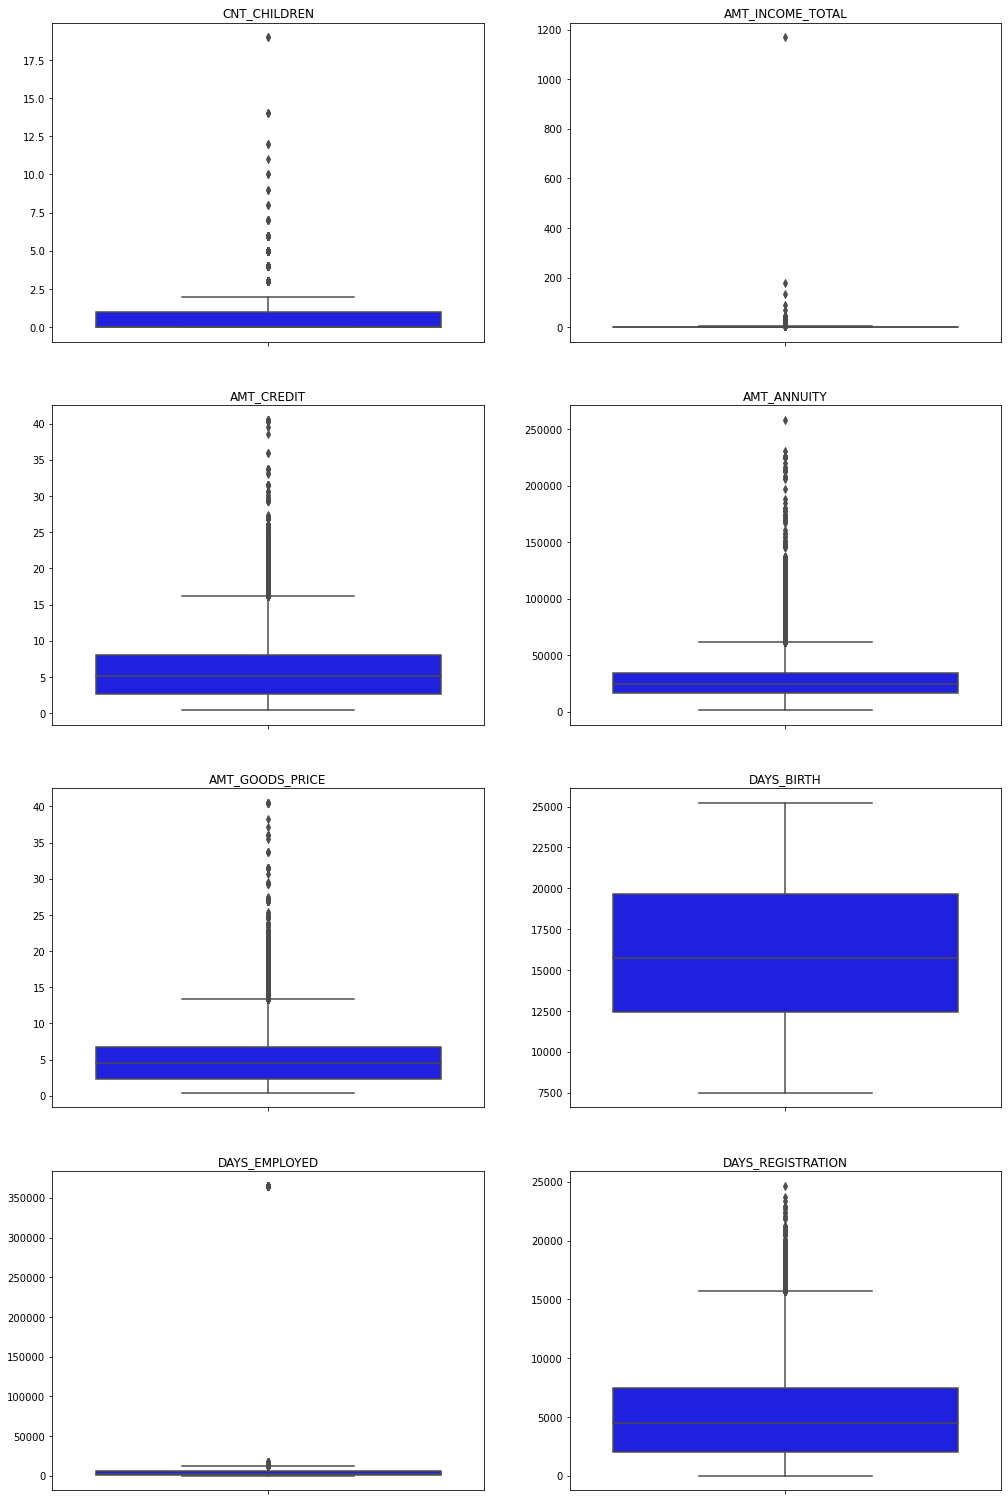

In [64]:
plt.figure(figsize = [17,27])
for i, j in itertools.zip_longest(outlier_col, range(len(outlier_col))):
    plt.subplot(4,2, j+1)
    sns.boxplot(y= app_data[i], orient = "h", color = "blue")
    #plt.yticks(fontsize = 8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)
    

##### INSIGHTS

It can be seen that in current application data

1. AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE, CNT_CHILDREN have some number of outliers.

2. AMT_INCOME_TOTAL has huge number of outliers which indicate that few of the loan applicants have high income when compared to the others.

3. DAYS_BIRTH has no outliers which means the data avaible is reliable.

4. DAYS_EMPLOYED has outlier values around 350000(days) which is around 958 years which is impossible and hence this has to be incorrect entry.

In [65]:
app_data.nunique().sort_values()

LIVE_REGION_NOT_WORK_REGION         2
TARGET                              2
NAME_CONTRACT_TYPE                  2
REG_REGION_NOT_LIVE_REGION          2
FLAG_OWN_REALTY                     2
LIVE_CITY_NOT_WORK_CITY             2
REG_CITY_NOT_WORK_CITY              2
REG_CITY_NOT_LIVE_CITY              2
FLAG_DOCUMENT_3                     2
REG_REGION_NOT_WORK_REGION          2
FLAG_MOBIL                          2
REGION_RATING_CLIENT                3
CODE_GENDER                         3
REGION_RATING_CLIENT_W_CITY         3
NAME_EDUCATION_TYPE                 5
AMT_REQ_CREDIT_BUREAU_HOUR          5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
EMPLOYEMENT_YEARS                   7
WEEKDAY_APPR_PROCESS_START          7
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
AMT_REQ_CREDIT_BUREAU_WEEK          9
AMT_REQ_CREDIT_BUREAU_DAY           9
DEF_60_CNT_SOCIAL_CIRCLE            9
AGE_GROUP                           9
DEF_30_CNT_S

In [66]:
#checking the num of unique values each column posses to identify categorical columns 

app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_REALTY              307511 non-null  object  
 5   CNT_CHILDREN                 307511 non-null  int64   
 6   AMT_INCOME_TOTAL             307511 non-null  float64 
 7   AMT_CREDIT                   307511 non-null  float64 
 8   AMT_ANNUITY                  307499 non-null  float64 
 9   AMT_GOODS_PRICE              307233 non-null  float64 
 10  NAME_TYPE_SUITE              306219 non-null  object  
 11  NAME_INCOME_TYPE             307511 non-null  object  
 12  NAME_EDUCATION_TYPE          307511 non-null

# 6. Converting Desired columns from object to categorical column

In [67]:
app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT

In [68]:
#from the list, we have taken out the desired columns for conversion

categorical_col = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                       'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START',
                       'ORGANIZATION_TYPE','FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY',
                       'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION',
                       'LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT','WEEKDAY_APPR_PROCESS_START',
                       'REGION_RATING_CLIENT_W_CITY','CNT_CHILDREN','CNT_FAM_MEMBERS']

for col in categorical_col:
    app_data[col] = pd.Categorical(app_data[col])

In [69]:
#converting total of 21 columns to categorical one 

len(categorical_col) 

21

In [70]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_REALTY              307511 non-null  category
 5   CNT_CHILDREN                 307511 non-null  category
 6   AMT_INCOME_TOTAL             307511 non-null  float64 
 7   AMT_CREDIT                   307511 non-null  float64 
 8   AMT_ANNUITY                  307499 non-null  float64 
 9   AMT_GOODS_PRICE              307233 non-null  float64 
 10  NAME_TYPE_SUITE              306219 non-null  category
 11  NAME_INCOME_TYPE             307511 non-null  category
 12  NAME_EDUCATION_TYPE          307511 non-null

# INSIGHTS

After imputing we have 53 columns and we will move ahead with data analysis on these columns


# Dataset 2 - "Previous_applications.csv"


Note : Have followed similar steps done for application_data.csv


In [71]:
#importing previous_application file
pre_app = pd.read_csv("previous_application.csv")

In [72]:
pre_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
#checking rows and columns of the raw data

pre_app.shape

(1670214, 37)

In [74]:
#checking info of all the columns like data types

pre_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

There are 37 columns having various data types like object, int, float and 1670214 rows

In [75]:
pre_app.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


##### INSIGHTS

There are 37 columns and 1679214 rows.

There columns having negative, positive values which includes days, fixing is required 

In [76]:
#checking how many null values are present in each of the columns in percentage
null_values(pre_app)

RATE_INTEREST_PRIVILEGED       99.64
RATE_INTEREST_PRIMARY          99.64
AMT_DOWN_PAYMENT               53.64
RATE_DOWN_PAYMENT              53.64
NAME_TYPE_SUITE                49.12
NFLAG_INSURED_ON_APPROVAL      40.30
DAYS_TERMINATION               40.30
DAYS_LAST_DUE                  40.30
DAYS_LAST_DUE_1ST_VERSION      40.30
DAYS_FIRST_DUE                 40.30
DAYS_FIRST_DRAWING             40.30
AMT_GOODS_PRICE                23.08
AMT_ANNUITY                    22.29
CNT_PAYMENT                    22.29
PRODUCT_COMBINATION             0.02
AMT_CREDIT                      0.00
NAME_YIELD_GROUP                0.00
NAME_PORTFOLIO                  0.00
NAME_SELLER_INDUSTRY            0.00
SELLERPLACE_AREA                0.00
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
SK_ID_PREV                      0.00
NAME_GOODS_CATEGORY             0.00
NAME_CLIENT_TYPE                0.00
CODE_REJECT_REASON              0.00
SK_ID_CURR                      0.00
D

In [77]:
#creating a variable p_null_col_50 for storing null columns having missing more than 50%

p_null_col_50 = null_values(pre_app)[null_values(pre_app)>50]

In [78]:
#Only 4 columns with missing values more than 50%

p_null_col_50 

RATE_INTEREST_PRIVILEGED    99.64
RATE_INTEREST_PRIMARY       99.64
AMT_DOWN_PAYMENT            53.64
RATE_DOWN_PAYMENT           53.64
dtype: float64

In [79]:
#dropping null columns having missing values more than 50%
pre_app.drop(columns = p_null_col_50.index, inplace= True)

In [80]:
#creating a variable p_null_col_15 for storing null columns having missing values more than 15%

p_null_col_15 = null_values(pre_app)[null_values(pre_app)>15]

In [81]:
p_null_col_15

NAME_TYPE_SUITE              49.12
DAYS_FIRST_DRAWING           40.30
DAYS_TERMINATION             40.30
DAYS_LAST_DUE                40.30
DAYS_LAST_DUE_1ST_VERSION    40.30
DAYS_FIRST_DUE               40.30
NFLAG_INSURED_ON_APPROVAL    40.30
AMT_GOODS_PRICE              23.08
AMT_ANNUITY                  22.29
CNT_PAYMENT                  22.29
dtype: float64

In [82]:
pre_app[p_null_col_15.index]

,NAME_TYPE_SUITE,DAYS_FIRST_DRAWING,DAYS_TERMINATION,DAYS_LAST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DUE,NFLAG_INSURED_ON_APPROVAL,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT
0,NaN,365243.0,-37.0,-42.0,300.0,-42.0,0.0,17145.0,1730.430,12.0
1,Unaccompanied,365243.0,365243.0,365243.0,916.0,-134.0,1.0,607500.0,25188.615,36.0
2,"Spouse, partner",365243.0,365243.0,365243.0,59.0,-271.0,1.0,112500.0,15060.735,12.0
3,NaN,365243.0,-177.0,-182.0,-152.0,-482.0,1.0,450000.0,47041.335,12.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,337500.0,31924.395,24.0
...,...,...,...,...,...,...,...,...,...,...
1670209,NaN,365243.0,-351.0,-358.0,362.0,-508.0,0.0,267295.5,14704.290,30.0
1670210,Unaccompanied,365243.0,-1297.0,-1304.0,-1274.0,-1604.0,0.0,87750.0,6622.020,12.0
1670211,"Spouse, partner",365243.0,-1181.0,-1187.0,-1187.0,-1457.0,0.0,105237.0,11520.855,10.0
1670212,Family,365243.0,-817.0,-825.0,-825.0,-1155.0,1.0,180000.0,18821.520,12.0


In [83]:
pre_app.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'], dtype='object')

In [84]:
# Listing down columns which are not needed
Unnecessary_prev = ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']

pre_app.drop(Unnecessary_prev,axis =1, inplace = True)

pre_app.shape

(1670214, 29)

In [85]:
# IMputing values "Unknown" as this a categorical column
pre_app["NAME_TYPE_SUITE"] = pre_app["NAME_TYPE_SUITE"].fillna("Unknown")

null_values(pre_app)

NFLAG_INSURED_ON_APPROVAL    40.30
DAYS_TERMINATION             40.30
DAYS_LAST_DUE                40.30
DAYS_LAST_DUE_1ST_VERSION    40.30
DAYS_FIRST_DUE               40.30
DAYS_FIRST_DRAWING           40.30
AMT_GOODS_PRICE              23.08
AMT_ANNUITY                  22.29
CNT_PAYMENT                  22.29
PRODUCT_COMBINATION           0.02
AMT_CREDIT                    0.00
NAME_PRODUCT_TYPE             0.00
NAME_YIELD_GROUP              0.00
NAME_SELLER_INDUSTRY          0.00
SELLERPLACE_AREA              0.00
CHANNEL_TYPE                  0.00
SK_ID_PREV                    0.00
NAME_PORTFOLIO                0.00
SK_ID_CURR                    0.00
NAME_CLIENT_TYPE              0.00
NAME_TYPE_SUITE               0.00
CODE_REJECT_REASON            0.00
NAME_PAYMENT_TYPE             0.00
DAYS_DECISION                 0.00
NAME_CONTRACT_STATUS          0.00
NAME_CASH_LOAN_PURPOSE        0.00
AMT_APPLICATION               0.00
NAME_CONTRACT_TYPE            0.00
NAME_GOODS_CATEGORY 

There are missing values in columns 'DAYS_FIRST_DUE', 'DAYS_TERMINATION', 'DAYS_FIRST_DRAWING','DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE' and these columns count days thus will keeping null values as they are** 

In [86]:
#Analying numerical columns using describe 

pre_app[p_null_col_15.index].describe()

,DAYS_FIRST_DRAWING,DAYS_TERMINATION,DAYS_LAST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DUE,NFLAG_INSURED_ON_APPROVAL,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT
count,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,1.284699e+06,1.297979e+06,1.297984e+06
mean,342209.855039,81992.343838,76582.403064,33767.774054,13826.269337,0.332570,2.278473e+05,1.595512e+04,1.605408e+01
std,88916.115834,153303.516729,149647.415123,106857.034789,72444.869708,0.471134,3.153966e+05,1.478214e+04,1.456729e+01
min,-2922.000000,-2874.000000,-2889.000000,-2801.000000,-2892.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,365243.000000,-1270.000000,-1314.000000,-1242.000000,-1628.000000,0.000000,5.084100e+04,6.321780e+03,6.000000e+00
50%,365243.000000,-499.000000,-537.000000,-361.000000,-831.000000,0.000000,1.123200e+05,1.125000e+04,1.200000e+01
75%,365243.000000,-44.000000,-74.000000,129.000000,-411.000000,1.000000,2.340000e+05,2.065842e+04,2.400000e+01
max,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000,6.905160e+06,4.180581e+05,8.400000e+01


In [87]:
# To convert negative days to postive days creating a varaible "p_days_col"

p_days_col = ['DAYS_DECISION','DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION']

pre_app[p_days_col].describe() # Analysis before conversion

,DAYS_DECISION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION
count,1.670214e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,-8.806797e+02,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838
std,7.790997e+02,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729
min,-2.922000e+03,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000
25%,-1.300000e+03,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000
50%,-5.810000e+02,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000
75%,-2.800000e+02,365243.000000,-411.000000,129.000000,-74.000000,-44.000000
max,-1.000000e+00,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000


In [88]:
# Converting Negative days to positive days

pre_app[p_days_col] = abs(pre_app[p_days_col])

pre_app[p_null_col_15.index].describe() # analysing after conversion

,DAYS_FIRST_DRAWING,DAYS_TERMINATION,DAYS_LAST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DUE,NFLAG_INSURED_ON_APPROVAL,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT
count,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,1.284699e+06,1.297979e+06,1.297984e+06
mean,342340.056543,83505.775017,78152.730207,35163.363265,15949.224065,0.332570,2.278473e+05,1.595512e+04,1.605408e+01
std,88413.495220,152484.418802,148833.342466,106405.950190,72007.270877,0.471134,3.153966e+05,1.478214e+04,1.456729e+01
min,2.000000,2.000000,2.000000,0.000000,2.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,365243.000000,447.000000,455.000000,257.000000,475.000000,0.000000,5.084100e+04,6.321780e+03,6.000000e+00
50%,365243.000000,1171.000000,1155.000000,741.000000,921.000000,0.000000,1.123200e+05,1.125000e+04,1.200000e+01
75%,365243.000000,2501.000000,2418.000000,1735.000000,1825.000000,1.000000,2.340000e+05,2.065842e+04,2.400000e+01
max,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000,6.905160e+06,4.180581e+05,8.400000e+01


In [89]:
#days group calculation e.g. 369 will be grouped as with in 2 years

bins = [0,1*365,2*365,3*365,4*365,5*365,6*365,7*365,10*365]
slots = ["1","2","3","4","5","6","7","7 above"]
pre_app['YEARLY_DECISION'] = pd.cut(pre_app['DAYS_DECISION'],bins,labels=slots)

In [90]:
pre_app['YEARLY_DECISION'].value_counts(normalize=True)*100

1          34.351287
2          23.056806
3          12.855598
4           7.883181
5           6.128556
7           5.813806
7 above     5.060729
6           4.850037
Name: YEARLY_DECISION, dtype: float64

###### Insight
Almost 35% loan applicatants have applied for a new loan within 1 year of previous loan decision**

In [91]:
pre_app.nunique()

SK_ID_PREV                   1670214
SK_ID_CURR                    338857
NAME_CONTRACT_TYPE                 4
AMT_ANNUITY                   357959
AMT_APPLICATION                93885
AMT_CREDIT                     86803
AMT_GOODS_PRICE                93885
NAME_CASH_LOAN_PURPOSE            25
NAME_CONTRACT_STATUS               4
DAYS_DECISION                   2922
NAME_PAYMENT_TYPE                  4
CODE_REJECT_REASON                 9
NAME_TYPE_SUITE                    8
NAME_CLIENT_TYPE                   4
NAME_GOODS_CATEGORY               28
NAME_PORTFOLIO                     5
NAME_PRODUCT_TYPE                  3
CHANNEL_TYPE                       8
SELLERPLACE_AREA                2097
NAME_SELLER_INDUSTRY              11
CNT_PAYMENT                       49
NAME_YIELD_GROUP                   5
PRODUCT_COMBINATION               17
DAYS_FIRST_DRAWING              2838
DAYS_FIRST_DUE                  2892
DAYS_LAST_DUE_1ST_VERSION       2803
DAYS_LAST_DUE                   2873
D

In [92]:
null_values(pre_app)

NFLAG_INSURED_ON_APPROVAL    40.30
DAYS_TERMINATION             40.30
DAYS_LAST_DUE                40.30
DAYS_LAST_DUE_1ST_VERSION    40.30
DAYS_FIRST_DUE               40.30
DAYS_FIRST_DRAWING           40.30
AMT_GOODS_PRICE              23.08
AMT_ANNUITY                  22.29
CNT_PAYMENT                  22.29
PRODUCT_COMBINATION           0.02
AMT_CREDIT                    0.00
SK_ID_PREV                    0.00
CHANNEL_TYPE                  0.00
NAME_YIELD_GROUP              0.00
NAME_SELLER_INDUSTRY          0.00
SELLERPLACE_AREA              0.00
NAME_PORTFOLIO                0.00
NAME_PRODUCT_TYPE             0.00
SK_ID_CURR                    0.00
NAME_GOODS_CATEGORY           0.00
NAME_CLIENT_TYPE              0.00
NAME_TYPE_SUITE               0.00
CODE_REJECT_REASON            0.00
NAME_PAYMENT_TYPE             0.00
DAYS_DECISION                 0.00
NAME_CONTRACT_STATUS          0.00
NAME_CASH_LOAN_PURPOSE        0.00
AMT_APPLICATION               0.00
NAME_CONTRACT_TYPE  

#### Now dealing with continuos variables "AMT_ANNUITY", "AMT_GOODS_PRICE" 
#### To impute null values in continuous variables, we plotted the distribution of the columns and used
median if the distribution is skewed**
mode if the distribution pattern is preserved.**

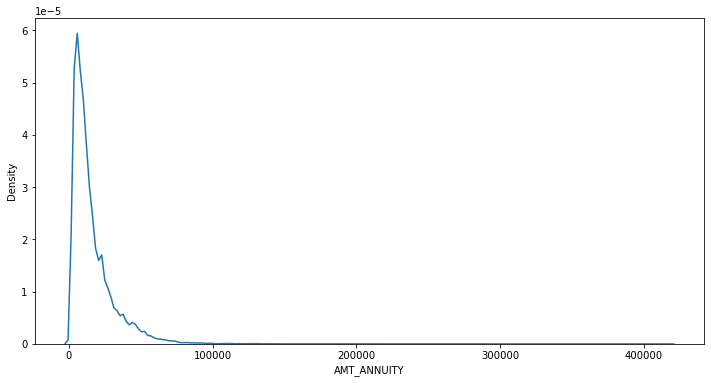

In [93]:
#plotting a kdeplot to understand distribution of "AMT_ANNUITY"

plt.figure(figsize=(12,6))
sns.kdeplot(pre_app['AMT_ANNUITY'])
plt.show()

##### Insight
There is a single peak at the left side of the distribution and it indicates the presence of outliers and hence imputing with mean would not be the right approach and hence imputing with median.**

In [94]:
#imputing missing values with median 

pre_app['AMT_ANNUITY'].fillna(pre_app['AMT_ANNUITY'].median(),inplace = True)

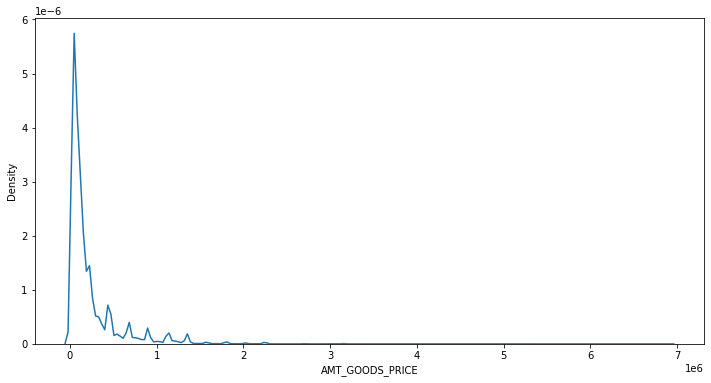

In [95]:
# Plotting kde plot for "AMT_GOODS_PRICE" to understand the distribution

plt.figure(figsize=(12,6))
sns.kdeplot(pre_app['AMT_GOODS_PRICE'])
plt.show()

There are several peaks along the distribution. Let's impute using the mode, mean and median and see if the distribution is still about the same.**

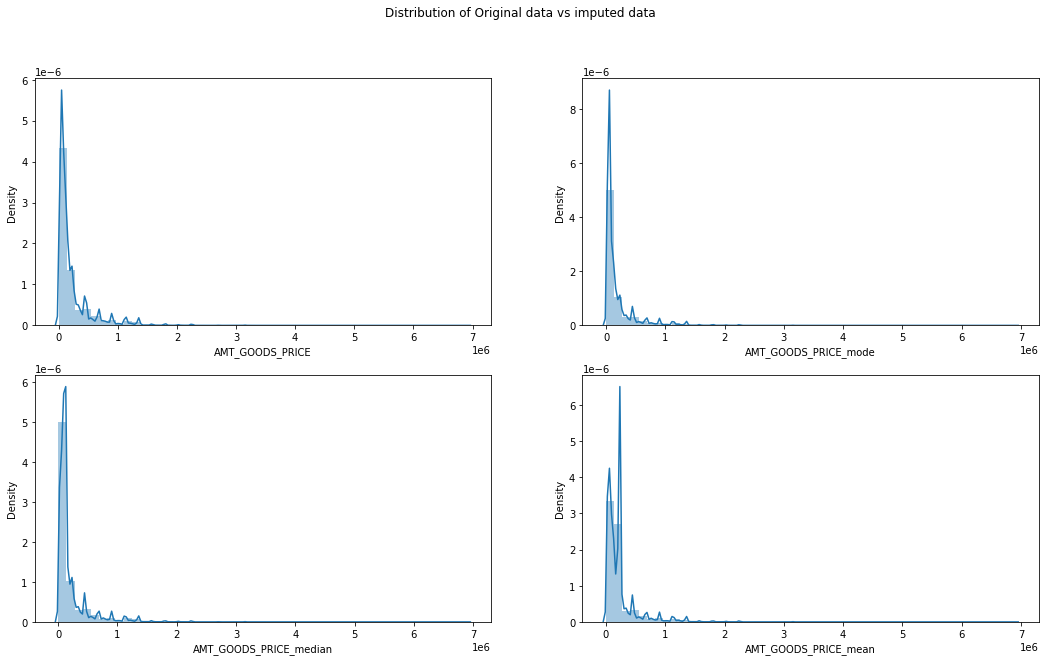

In [96]:
# Creating new dataframe for "AMT_GOODS_PRICE" with columns imputed with mode, median and mean

statsDF = pd.DataFrame() 
statsDF['AMT_GOODS_PRICE_mode'] = pre_app['AMT_GOODS_PRICE'].fillna(pre_app['AMT_GOODS_PRICE'].mode()[0])
statsDF['AMT_GOODS_PRICE_median'] = pre_app['AMT_GOODS_PRICE'].fillna(pre_app['AMT_GOODS_PRICE'].median())
statsDF['AMT_GOODS_PRICE_mean'] = pre_app['AMT_GOODS_PRICE'].fillna(pre_app['AMT_GOODS_PRICE'].mean())

cols = ['AMT_GOODS_PRICE_mode', 'AMT_GOODS_PRICE_median','AMT_GOODS_PRICE_mean']

plt.figure(figsize=(18,10))
plt.suptitle('Distribution of Original data vs imputed data')
plt.subplot(221)
sns.distplot(pre_app['AMT_GOODS_PRICE'][pd.notnull(pre_app['AMT_GOODS_PRICE'])]);
for i in enumerate(cols): 
    plt.subplot(2,2,i[0]+2)
    sns.distplot(statsDF[i[1]])


The original distribution is closer with the distribution of data imputed with mode in this case, thus will impute mode for missing values

In [97]:
# Imputing null values with mode

pre_app['AMT_GOODS_PRICE'].fillna(pre_app['AMT_GOODS_PRICE'].mode()[0], inplace=True)

### Imputing CNT_PAYMENT with 0 as the NAME_CONTRACT_STATUS for these indicate that most of these loans were not started:

In [98]:
#taking out values count for NAME_CONTRACT_STATUS categories where CNT_PAYMENT have null values.

pre_app.loc[pre_app['CNT_PAYMENT'].isnull(),'NAME_CONTRACT_STATUS'].value_counts()

Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
Name: NAME_CONTRACT_STATUS, dtype: int64

In [99]:
#imputing null values as 0

pre_app['CNT_PAYMENT'].fillna(0,inplace = True)

In [100]:
pre_app.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL', 'YEARLY_DECISION'], dtype='object')

In [101]:
#Converting required categoical columns from Object to categorical 

p_catgorical_col = ['NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE',
                    'CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO',
                   'NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION',
                    'NAME_CONTRACT_TYPE']

for col in p_catgorical_col:
    pre_app[col] =pd.Categorical(pre_app[col])

# Finding outliers

In [102]:
pre_app.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670213e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.490651e+04,1.752339e+05,1.961140e+05,1.856429e+05,8.806797e+02,3.139511e+02,1.247621e+01,342340.056543,15949.224065,35163.363265,78152.730207,83505.775017,0.332570
std,5.325980e+05,1.028148e+05,1.317751e+04,2.927798e+05,3.185746e+05,2.871413e+05,7.790997e+02,7.127443e+03,1.447588e+01,88413.495220,72007.270877,106405.950190,148833.342466,152484.418802,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,1.461857e+06,1.893290e+05,7.547096e+03,1.872000e+04,2.416050e+04,4.500000e+04,2.800000e+02,-1.000000e+00,0.000000e+00,365243.000000,475.000000,257.000000,455.000000,447.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,7.105050e+04,5.810000e+02,3.000000e+00,1.000000e+01,365243.000000,921.000000,741.000000,1155.000000,1171.000000,0.000000
75%,2.384280e+06,3.675140e+05,1.682403e+04,1.803600e+05,2.164185e+05,1.804050e+05,1.300000e+03,8.200000e+01,1.600000e+01,365243.000000,1825.000000,1735.000000,2418.000000,2501.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,2.922000e+03,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


from describe we could find all the columns those wo have high difference between max and 75 percentile and the ones which makes no sense having max value to be so high are captured below

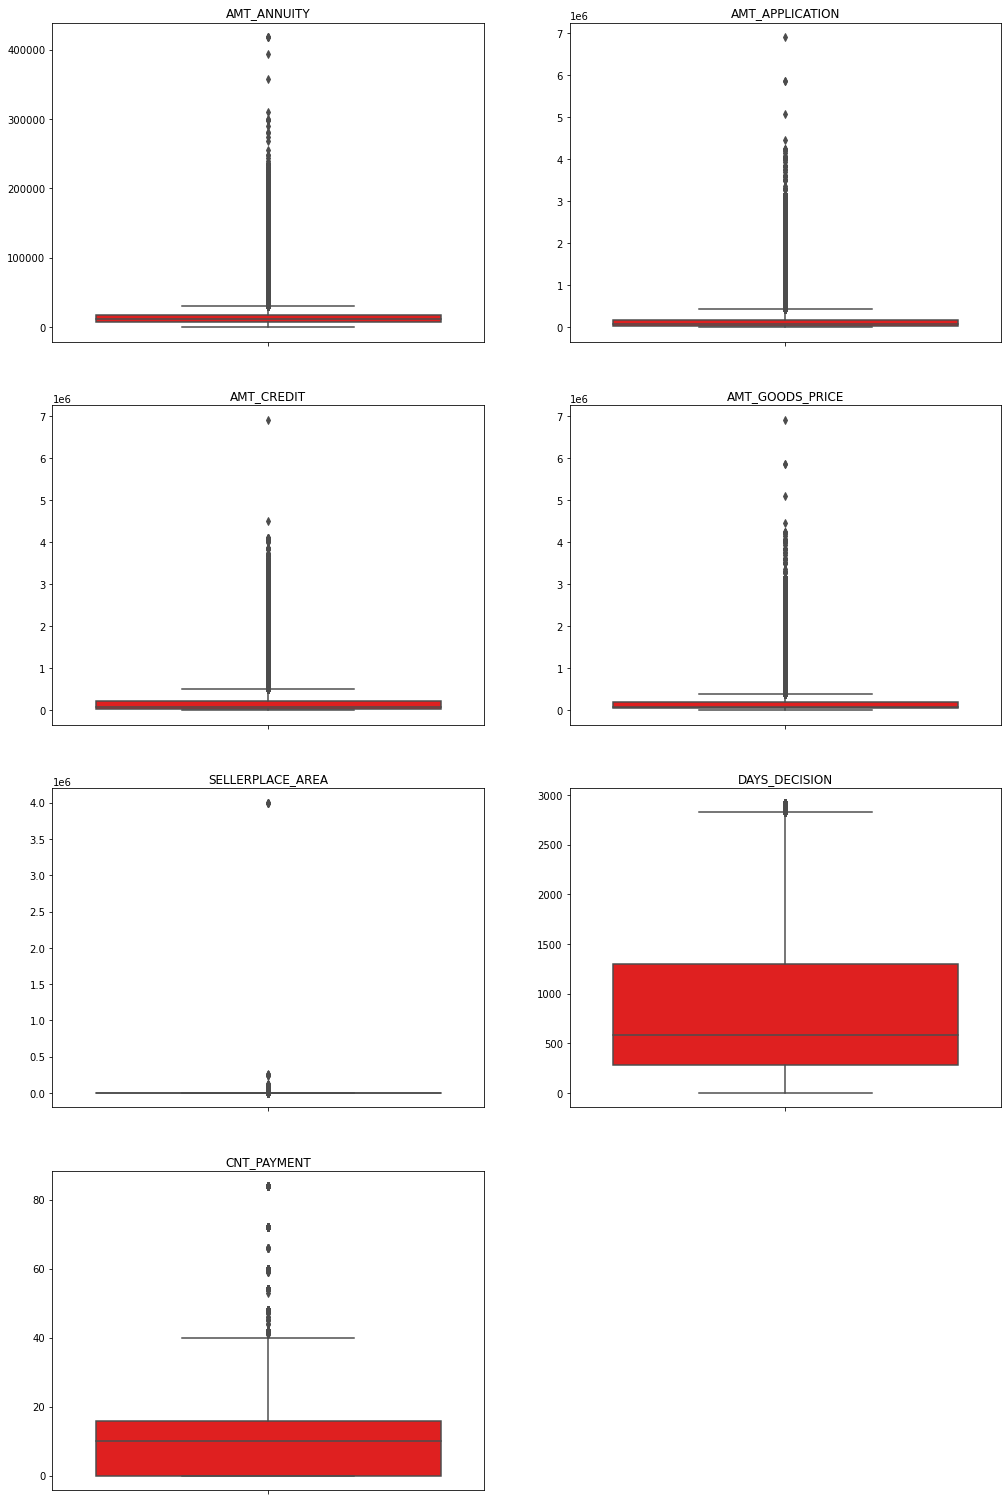

In [103]:
p_outlier_col = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE',
                 'SELLERPLACE_AREA','DAYS_DECISION','CNT_PAYMENT']

plt.figure(figsize=[17,27])
for i,j in itertools.zip_longest(p_outlier_col, range(len(p_outlier_col))):
    plt.subplot(4,2,j+1)
    sns.boxplot(y = pre_app[i], orient = "h", color = "red")
    #plt.yticks(fontsize=10)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

##### Insight

It can be seen that in previous application data**
AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE, SELLERPLACE_AREA have huge number of outliers.**
CNT_PAYMENT has few outlier values.**
DAYS_DECISION has little number of outliers indicating that these previous applications decisions were taken long back.**

# 6. Data Analysis Time

Strategy:
The data analysis flow has been planned in following way :

1. Imbalance in Data
2. Categorical Data Analysis
3. Categorical segmented Univariate Analysis
4. Categorical Bi/Multivariate analysis
5. Numeric Data Analysis
6. Bi-furcation of databased based on TARGET data
7. Correlation Matrix
8. Numerical segmented Univariate Analysis
9. Numerical Bi/Multivariate analysis

##### 6.1 Imbalance Data

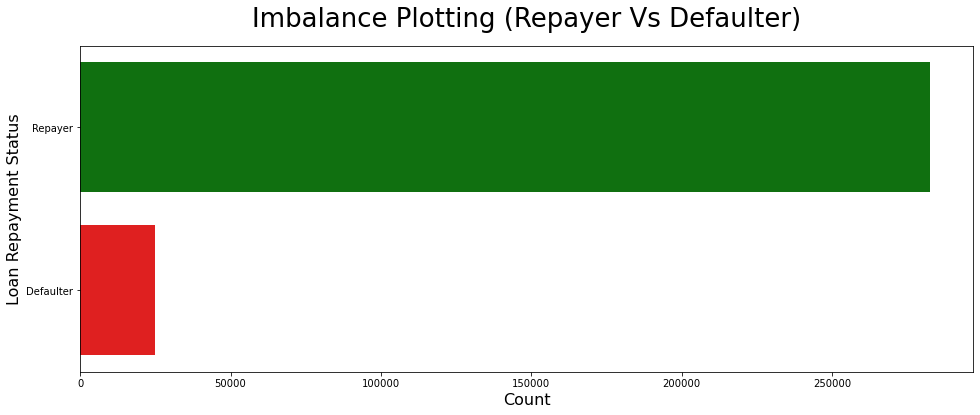

In [104]:
plt.figure(figsize= [16,6])
sns.barplot(y=["Repayer","Defaulter"], x = app_data["TARGET"].value_counts(), palette = ["green","r"],orient="h")
plt.ylabel("Loan Repayment Status",fontdict = {"fontsize":16})
plt.xlabel("Count",fontdict = {"fontsize":16})
plt.title("Imbalance Plotting (Repayer Vs Defaulter)", fontdict = {"fontsize":26}, pad = 19)
plt.show()

In [105]:
#Ratio of imbalance percentage with respect to defaulter and repayer is given below 
repayer = round((app_data["TARGET"].value_counts()[0]/len(app_data)* 100),2)
print("Repayer Percentage is {}%".format(repayer))
defaluter = round((app_data["TARGET"].value_counts()[1]/len(app_data)* 100),2)
print("Defaulter Percentage is {}%".format(defaluter))
print("Imbalance Ratio with respect to Repayer and Defaulter is given: {0:.2f}/1 (approx)".format(repayer/defaluter))

Repayer Percentage is 91.93%
Defaulter Percentage is 8.07%
Imbalance Ratio with respect to Repayer and Defaulter is given: 11.39/1 (approx)


##### 6.2 Plotting Functions

### Important Function for Univariate analysis

Creating a function for plotting Variables to do univariate analysis.
This function will create two plots
1. Count plot of given column w.r.t TARGET column
2. Percentage of defaulters within that column

The function is taking 6 arguments
1. dataset : to put the dataset we want to use
2. col : column name for which we need to the analysis
3. target_col : column name for with which we will be comparing
4. ylog : to have y-axis in log10 terms, in case the plot is not readable
5. x_label_angle : to maintain the orientation of x-axis labels
6. h_layout : to give horizontal layout of the subplots

In [106]:
# Creating a function to find if the column is categorical or numerical 

def data_type(dataset,col):
    if dataset[col].dtype == np.int64 or dataset[col].dtype == np.float64:
        return "numerical"
    if dataset[col].dtype == "category":
        return "categorical"
    
# Creating a function "univariate" to perform analysis one single variable with respect to target variable

def univariate(dataset,col,target_col,ylog=False,x_label_angle=False,h_layout=True):
    if data_type(dataset,col) == "numerical":
        sns.distplot(dataset[col],hist=False)
        
        
    elif data_type(dataset,col) == "categorical":
        val_count = dataset[col].value_counts()
        df1 = pd.DataFrame({col: val_count.index,'count': val_count.values})
        
        
        target_1_percentage = dataset[[col, target_col]].groupby([col],as_index=False).mean()
        target_1_percentage[target_col] = target_1_percentage[target_col]*100
        target_1_percentage.sort_values(by=target_col,inplace = True)
        
        
# If the plot is not readable, use the log scale

        if(h_layout):
            fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16,8))
        else:
            fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(26,36))
              
        
# 1. Subplot 1: Count plot of the column
        
        s = sns.countplot(ax=ax1, x=col, data=dataset, hue=target_col)
        ax1.set_title(col, fontsize = 21)
        ax1.legend(['Repayer','Defaulter'])
        ax1.set_xlabel(col,fontdict={'fontsize' : 16, 'fontweight' : 4})
        
        if(x_label_angle):
            s.set_xticklabels(s.get_xticklabels(),rotation=75)
        
# 2. Subplot 2: Percentage of defaulters within the column
        
        s = sns.barplot(ax=ax2, x = col, y=target_col, data=target_1_percentage)
        ax2.set_title("Defaulters % in "+col, fontsize = 21)    
        ax2.set_xlabel(col,fontdict={'fontsize' : 15, 'fontweight' : 4})
        ax2.set_ylabel(target_col,fontdict={'fontsize' : 16, 'fontweight' : 4})
        
        if(x_label_angle):
            s.set_xticklabels(s.get_xticklabels(),rotation=75)
            
            
# If the plot is not readable, use the log scale
                
        if ylog:
            ax1.set_yscale('log')
            ax1.set_ylabel("Count (log)",fontdict={'fontsize' : 16, 'fontweight' : 4})
        else:
            ax1.set_ylabel("Count",fontdict={'fontsize' : 16, 'fontweight' : 4})

        
        plt.show()

In [107]:
# function for plotting repetitive rel plots in bivaritae numerical analysis

def bivariate_n(x,y,df,hue,kind,labels):
    plt.figure(figsize=[16,16])
    sns.relplot(x=x, y=y, data=df, hue=hue,kind=kind,legend = False)
    plt.legend(labels=labels)
    plt.xticks(rotation=45, ha='right')
    plt.show()
    

In [108]:
# function for plotting repetitive barplots in bivariate categorical analysis

def bivariate_c(x,y,df,hue,figsize,labels):
    
    plt.figure(figsize=figsize)
    sns.barplot(x=x,y=y,data=df, hue=hue)     
        
    # Defining aesthetics of Labels and Title of the plot using style dictionaries
    plt.xlabel(x,fontsize = 16)    
    plt.ylabel(y,fontsize = 16)    
    plt.title(col,fontsize = 21) 
    plt.xticks(rotation=45, ha='right')
    plt.legend(labels = labels )
    plt.show()
    

In [109]:
#function for plotting repetitive countplots in univariate categorical analysis on the merged df

def univariate_c_merged(col,df,hue,palette,ylog,figsize):
    plt.figure(figsize=figsize)
    ax=sns.countplot(x=col, data=df,hue= hue,palette= palette,order=df[col].value_counts().index)
    

    if ylog:
        plt.yscale('log')
        plt.ylabel("Count (log)",fontsize=15)     
    else:
        plt.ylabel("Count",fontsize=15)       

    plt.title(col , fontsize=21) 
    plt.legend(loc = "upper right")
    plt.xticks(rotation=45, ha='right')
    
    plt.show()

In [110]:
# Function to plot point plots 

def pointplot(df,hue,x,y):
    plt.figure(figsize=(13,7))
    sns.pointplot(x=x, y=y, hue=hue, data=df)
    plt.title(x+" VS "+y,fontsize = 16)

In [111]:
# storing numnercial and categorical columns as list in belows varibles

cat_col = list(app_data.select_dtypes(["category"]).columns)   # Categorical columns list
num_col = list(app_data.select_dtypes(["int","float"]).columns)  #N Numerical Column list

# 6.3 Categorical Variables Analysis

##### 6.3.1 Segmented Univariate Analysis

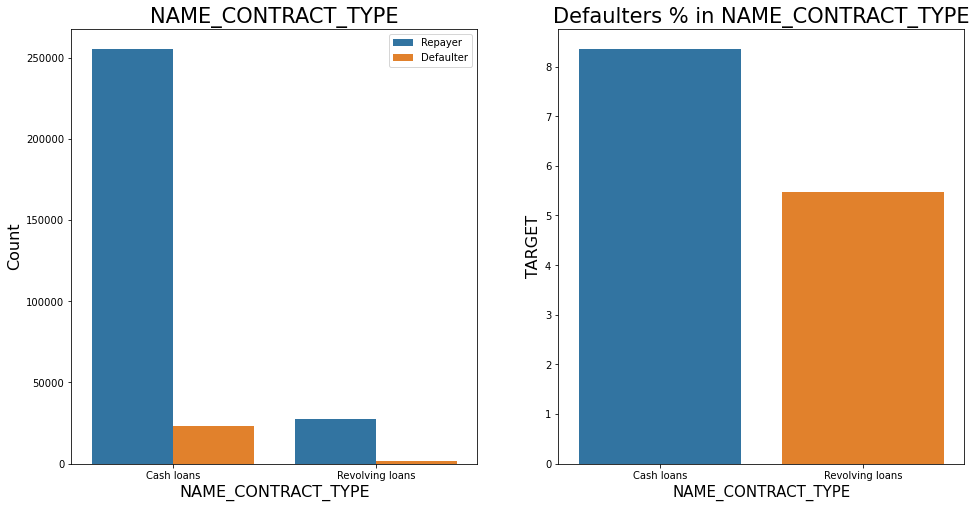

In [112]:
#1 Checking the contract type based on loan repayment status
univariate(app_data,"NAME_CONTRACT_TYPE","TARGET",False,False,True)

Inferences: Contract type
1. Revolving loans are just a small fraction (10%) from the total number of loans
2. Around 8-9% Cash loan applicants and 5-6% Revolving loan applicant are in defaulters

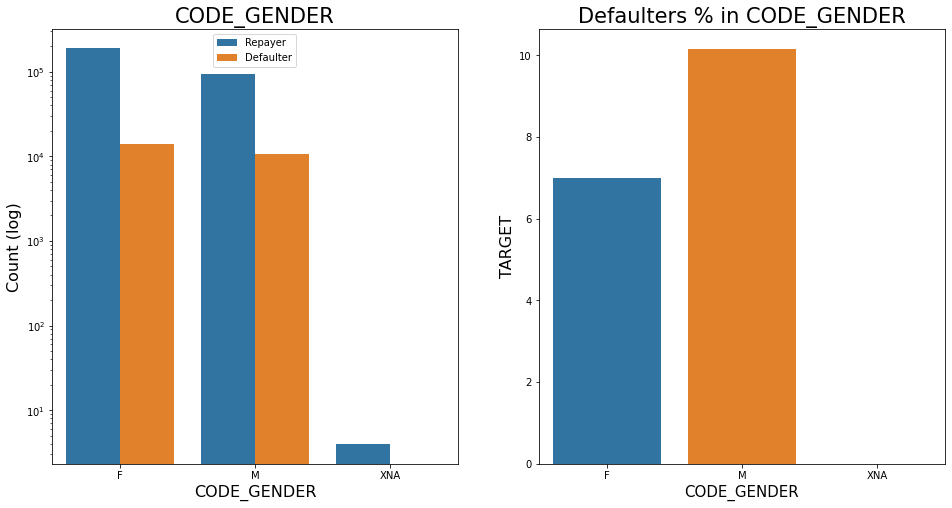

In [113]:
#2 Checking the type of Gender on loan repayment status
univariate(app_data,"CODE_GENDER","TARGET",True,False,True)

Inferences: Gender Type
1. The number of female clients is almost double the number of male clients.
2. Based on the percentage of defaulted credits, males have a higher chance of not returning their loans about 10%, comparing with women about 7%

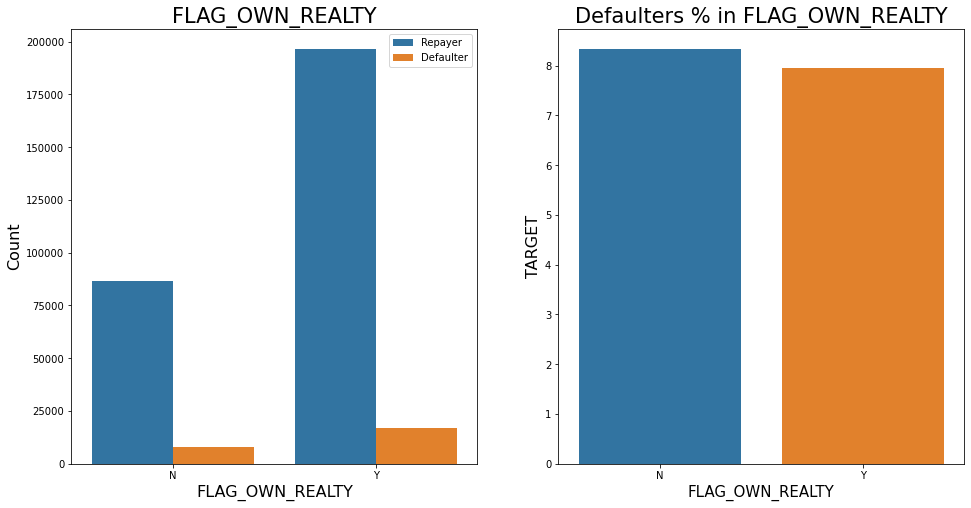

In [114]:
#3 Checking if owning a real estate is related to loan repayment status
univariate(app_data,"FLAG_OWN_REALTY","TARGET",False,False,True)

##### Inferences:
* The clients who own real estate are more than double of the ones that don't own.
* The defaulting rate of both categories are around the same (~8%). Thus we can infer that there is no correlation between owning a reality and defaulting the loan.

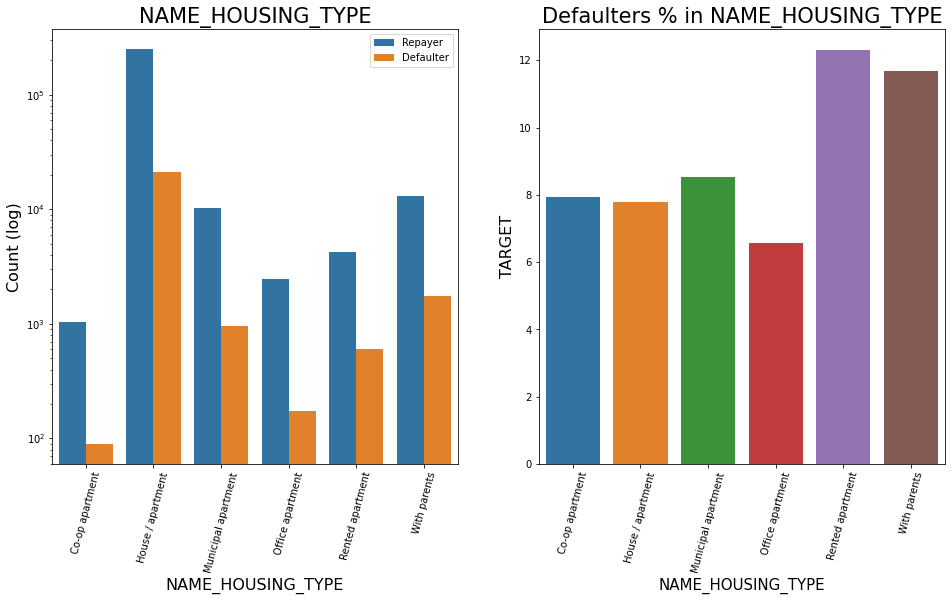

In [115]:
#4 Analyzing Housing Type based on loan repayment status
univariate(app_data,"NAME_HOUSING_TYPE","TARGET",True,True,True)

##### Inferences: Applicant House type
* Majority of people live in House/apartment
* People living in office apartments have lowest default rate
* People living with parents (~11.5%) and living in rented apartments(>12%) have higher probability of defaulting

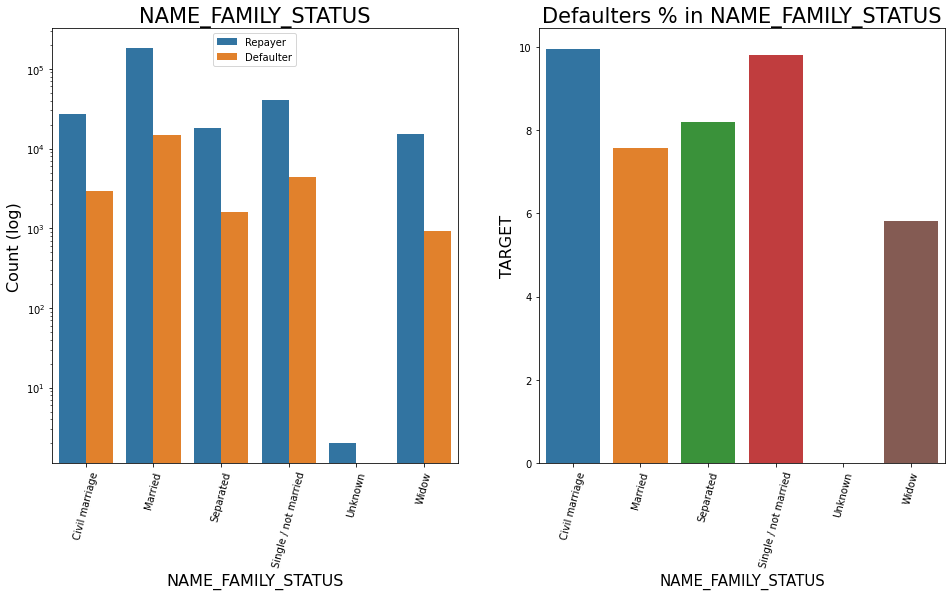

In [116]:
#5 Analyzing Family status based on loan repayment status
univariate(app_data,"NAME_FAMILY_STATUS","TARGET",True,True,True)

##### Inferences:
* **Most of the people who have taken loan are married, followed by Single/not married and civil marriage**
* **In Percentage of defaulters, Civil marriage has the highest percent around (10%) and widow has the lowest around 6% (exception being Unknown).**

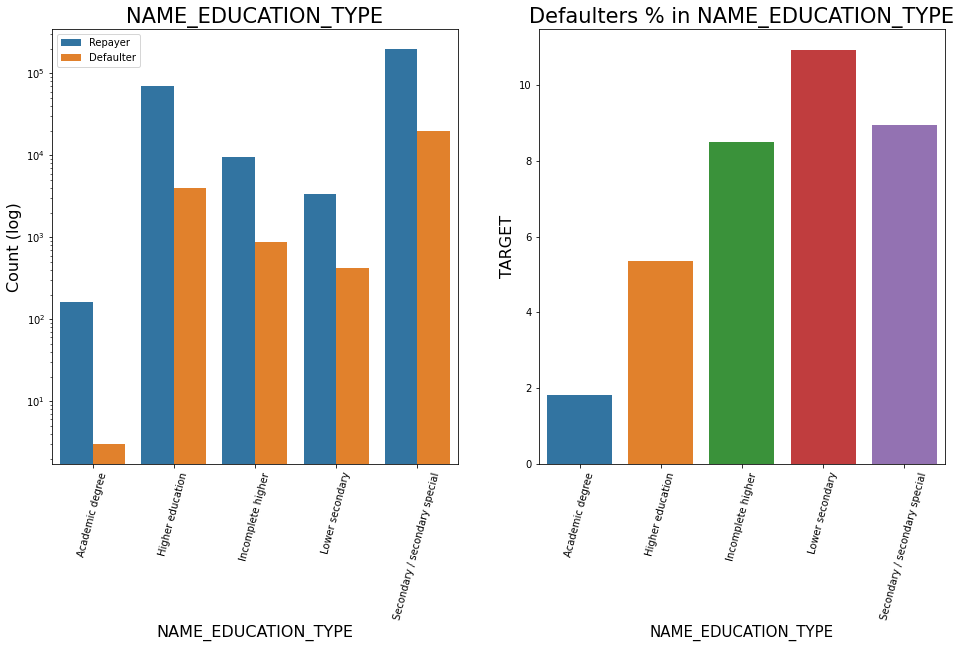

In [117]:
#6 Analyzing Education Type based on loan repayment status
univariate(app_data,"NAME_EDUCATION_TYPE","TARGET",True,True,True)

##### Inferences: Education Type
* Majority of clients have Secondary/secondary special education, followed by clients with Higher education.
* Very few clients have an academic degree
* Lower secondary category have highest rate of defaulting around 11%.
* People with Academic degree are least likely to default.

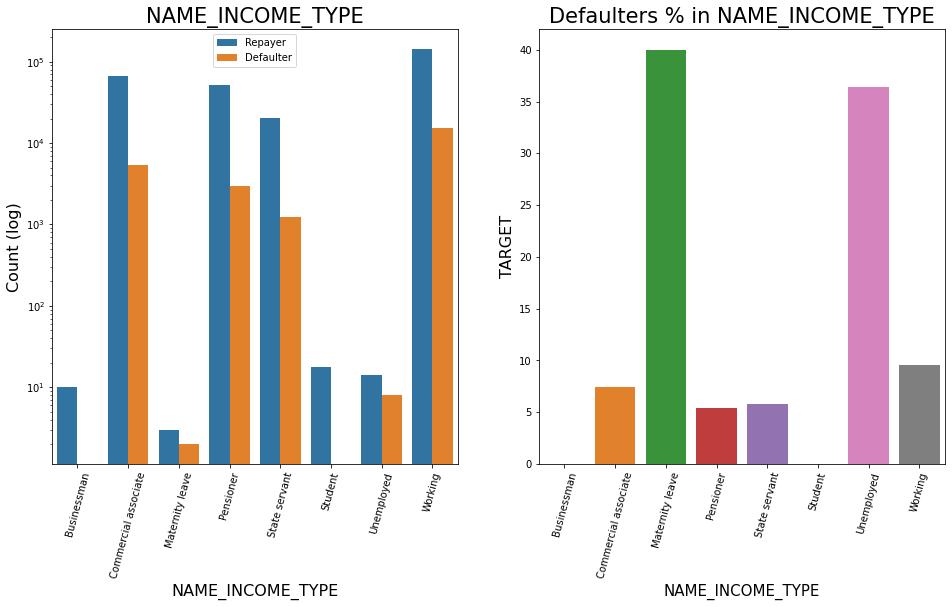

In [118]:
#7 Analyzing Income Type based on loan repayment status
univariate(app_data,"NAME_INCOME_TYPE","TARGET",True,True,True)

##### `Inferences:
* Most of applicants for loans income type is Working, followed by Commercial associate, Pensioner and State servant.
* The applicants who are on Maternity leave have defaulting percentage of 40% which is the highest, followed by Unemployed (37%). The rest under average around 10% defaultees.
* Student and Businessmen though less in numbers, do not have default record. Safest two categories for providing loan.

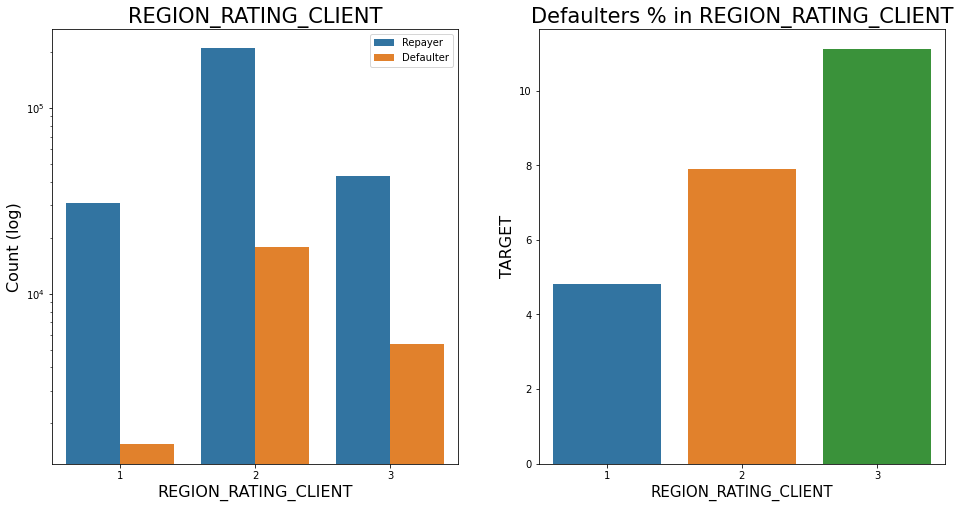

In [119]:
#8 Analyzing Region rating where applicant lives based on loan repayment status
univariate(app_data,"REGION_RATING_CLIENT","TARGET",True,False,True)

##### Inferences:Client Region Rating
* Most of the applicants are living in Region with Rating 2 place.
* Region Rating 3 has the highest default rate (11%)
* Applicant living in Region_Rating 1 has the lowest probability of defaulting, thus safer for approving loans

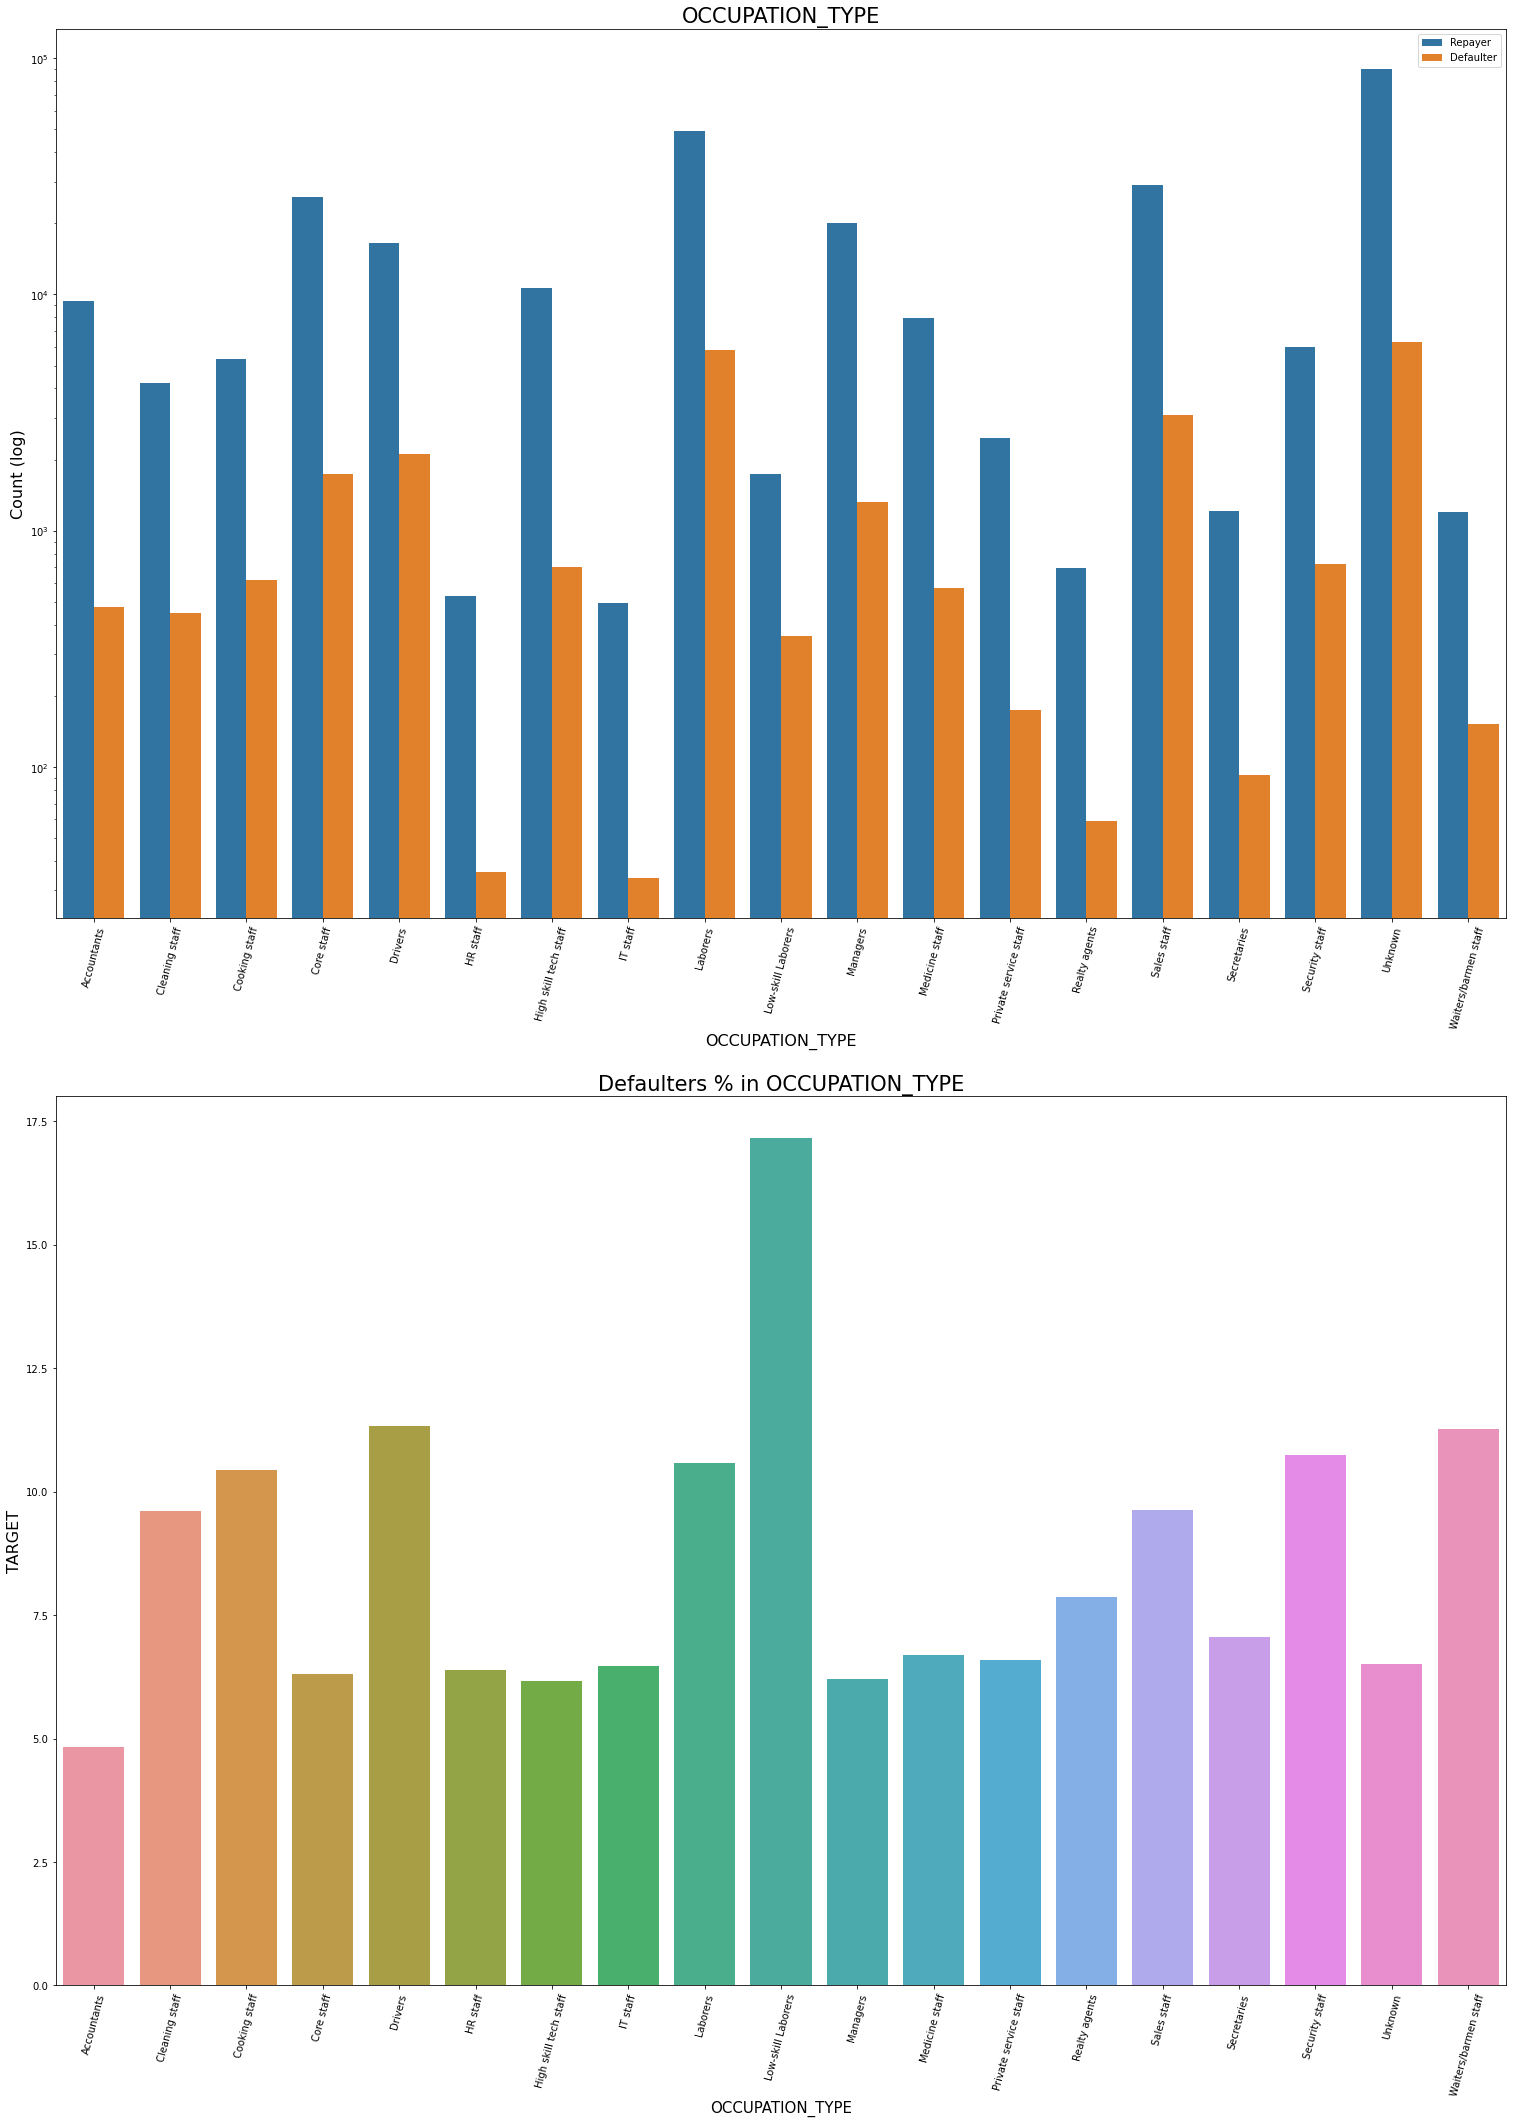

In [120]:
#9 Analyzing Occupation Type where applicant lives based on loan repayment status
univariate(app_data,"OCCUPATION_TYPE","TARGET",True,True,False)

##### Inferences:
* Most of the loans are taken by Laborers, followed by Sales staff.
* IT staff are less likely to apply for Loan.
* Category with highest percent of defautess are Low-skill Laborers (above 17%), followed by Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff

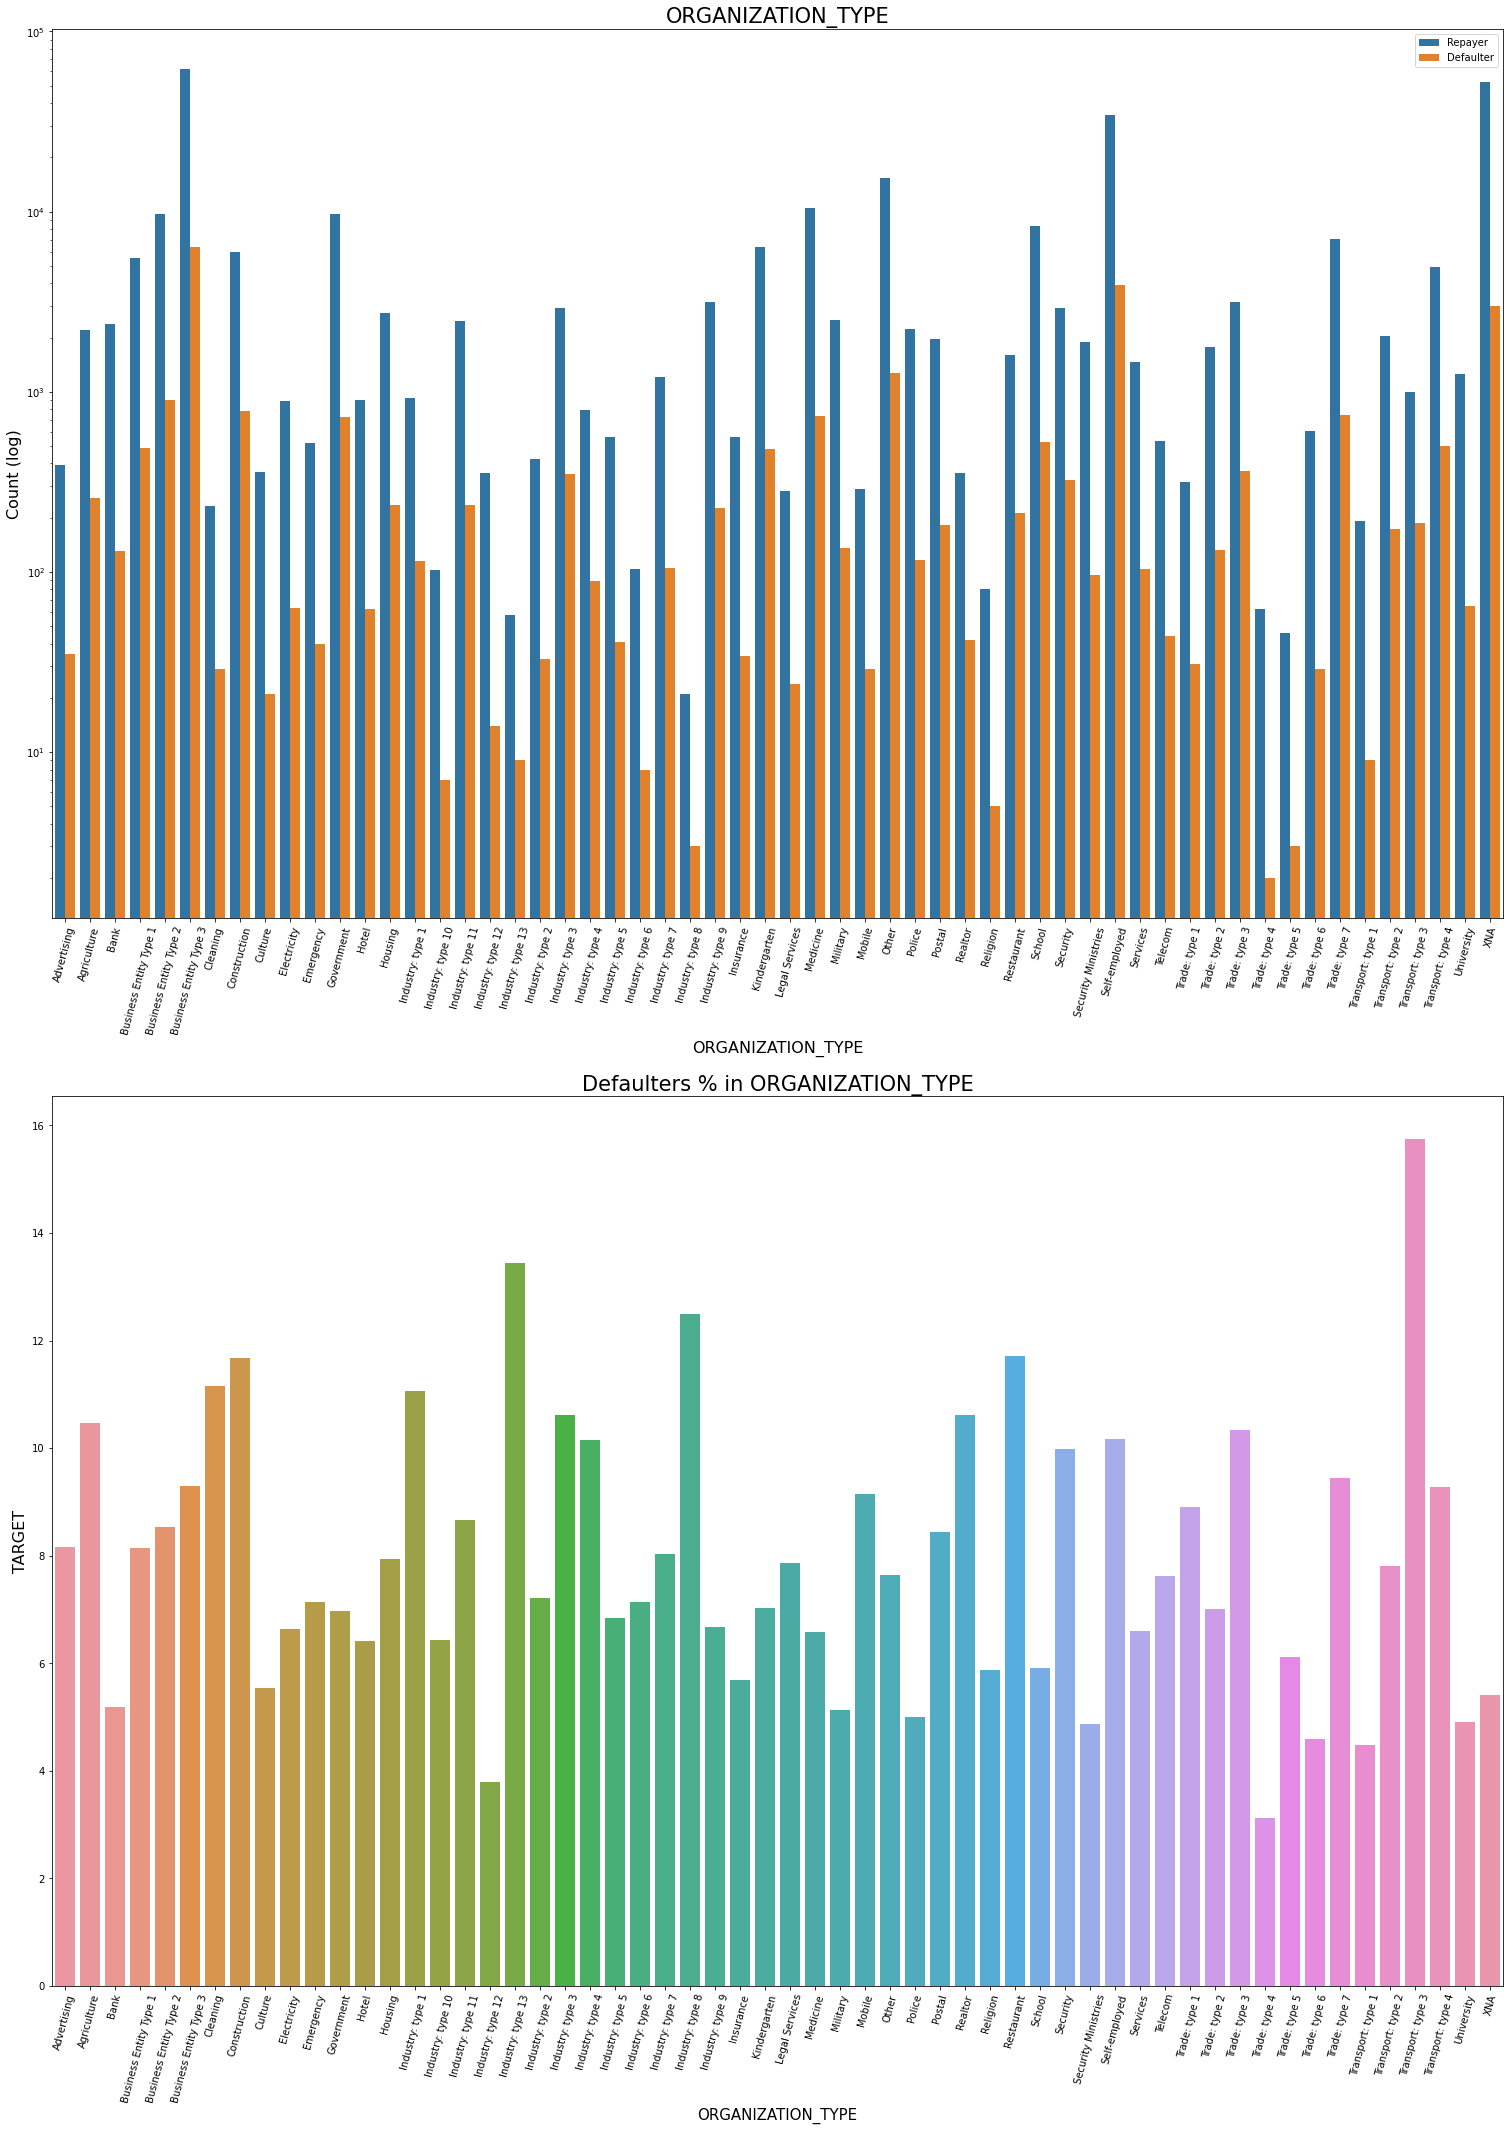

In [121]:
#10 Checking Loan repayment status based on Organization type

univariate(app_data,"ORGANIZATION_TYPE","TARGET",True,True,False)

##### Inferences: Organization Type
* Organizations with highest percent of defaultess are Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and Restaurant (less than 12%).
* Self employed people have relative high defaulting rate,to be safer side loan disbursement should be avoided or provide loan with higher interest rate to mitigate the risk of defaulting.
* Most of the people application for loan are from Business Entity Type 3
* For a very high number of applications, Organization type information is unavailable(XNA)
* It can be seen that following category of organization type has lesser defaulters thus safer for providing loans: Trade Type 4 and 5, Industry type 8

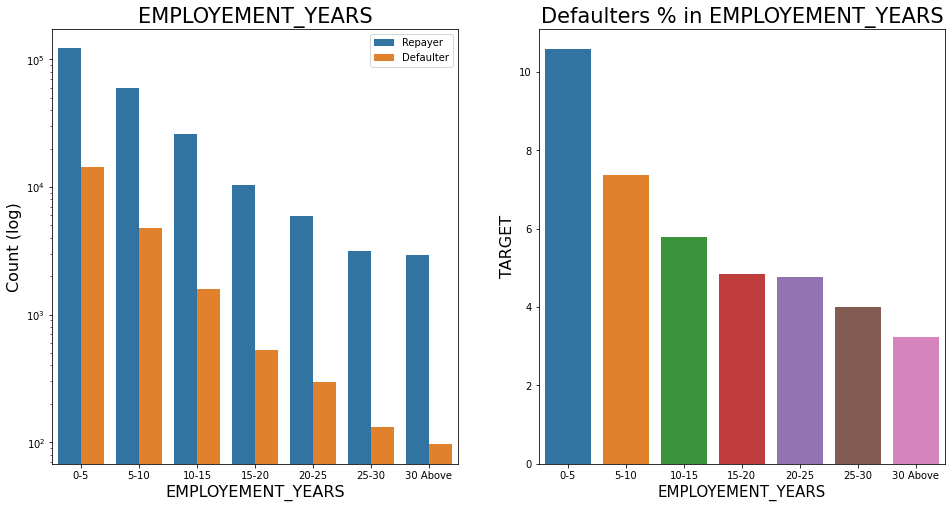

In [122]:
#11 Analyzing Employment_Year based on loan repayment status
univariate(app_data,"EMPLOYEMENT_YEARS","TARGET",True,False,True)

##### Inferences: Employment in Years
* Majority of the applicants having working experience between 0-5 years are defaultees. The defaulting rating of this group is also the highest which is around 10%
* With increase of employment year, defaulting rate is radually decreasing.
* with people having 40+ year experience have less than 1% default rate

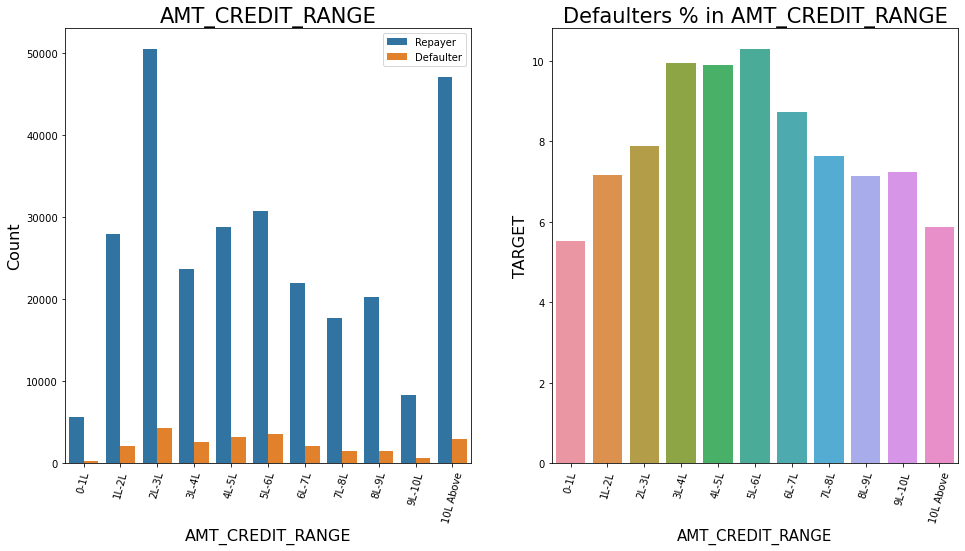

In [123]:
#12 Analyzing Amount_Credit based on loan repayment status

univariate(app_data,"AMT_CREDIT_RANGE","TARGET",False,True,True)

##### Inferences: Loan Amount
* there are high number of applicants have loan in range of 2-3 Lakhs followed by 10 Lakh above range.
* People who get loan for 3-6 Lakhs have most number of defaulters than other loan range.

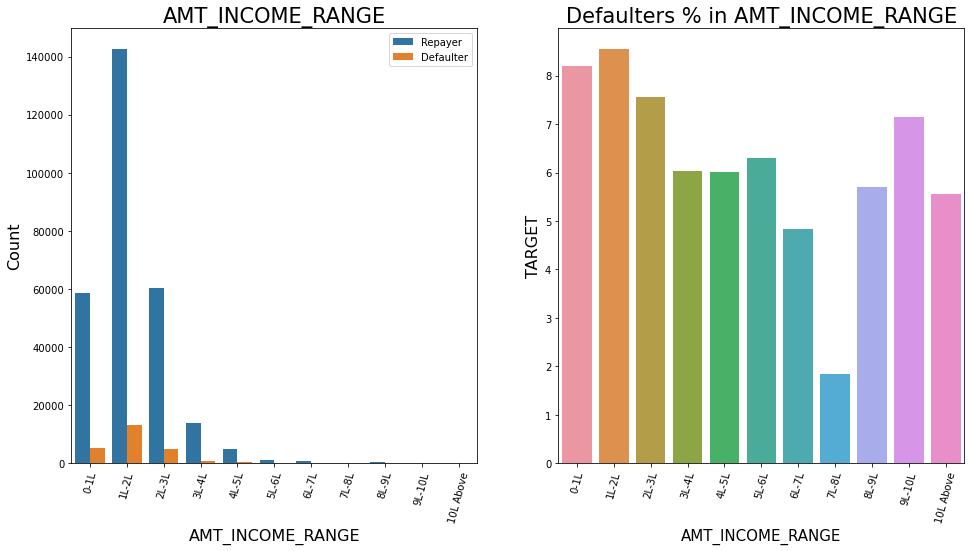

In [124]:
#13  Analyzing Amount_Income Range based on loan repayment status

univariate(app_data,"AMT_INCOME_RANGE","TARGET",False,True,True)

##### Inferences: Applicant Income
* Majority of the applications have Income total less than 3 Lakhs.
* Application with Income less than 3 Lakhs has high probability of defaulting.
* Applicant with Income 7-8 Lakhas are less likely to default.

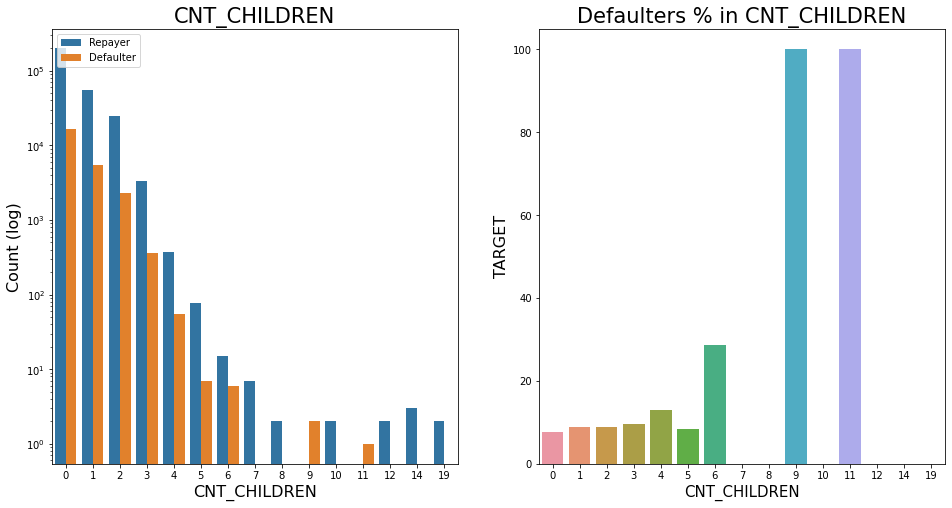

In [125]:
#14  Analyzing Number of children based on loan repayment status

univariate(app_data,"CNT_CHILDREN","TARGET",True,False,True)

##### Inferences : Client children's Count

* Most of the applicants do not have children 
* Very few cliens have more than 3 children
* Client who have more than 4 children has a very high default rate with child count 9 and 11 showing 100% default rate

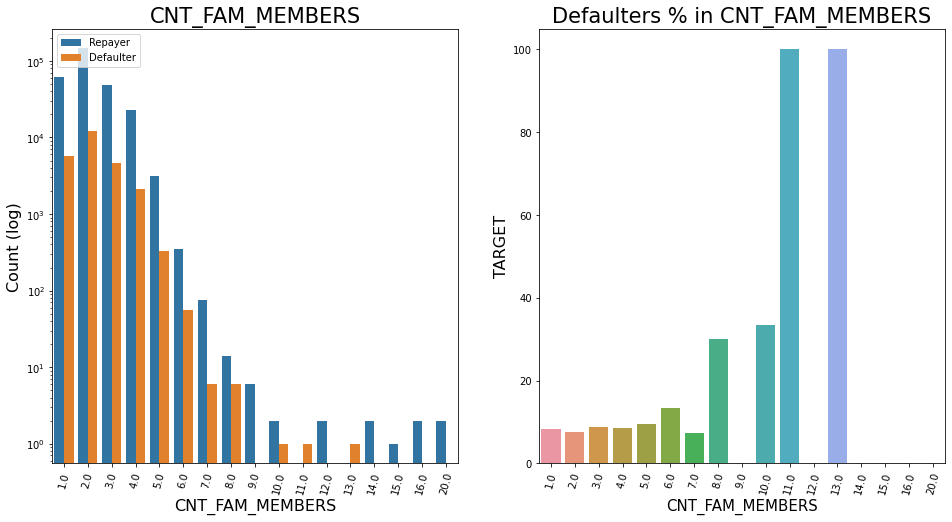

In [126]:
#15 Analyzing Number of family members based on loan repayment status
univariate(app_data,"CNT_FAM_MEMBERS","TARGET",True,True,True)

##### Inferences: Family Memembers Count
* Family member follows the same trend as children where having more family members increases the risk of defaulting

##### 6.3.2 Categorical Bivariate or Multivariate Analysis 

In [127]:
app_data.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].describe()

,count,mean,std,min,25%,50%,75%,max
NAME_INCOME_TYPE,,,,,,,,
Businessman,10.0,6.525000,6.272260,1.8000,2.250,4.9500,8.43750,22.5000
Commercial associate,71617.0,2.029553,1.479742,0.2655,1.350,1.8000,2.25000,180.0009
Maternity leave,5.0,1.404000,1.268569,0.4950,0.675,0.9000,1.35000,3.6000
Pensioner,55362.0,1.364013,0.766503,0.2565,0.900,1.1700,1.66500,22.5000
State servant,21703.0,1.797380,1.008806,0.2700,1.125,1.5750,2.25000,31.5000
Student,18.0,1.705000,1.066447,0.8100,1.125,1.5750,1.78875,5.6250
Unemployed,22.0,1.105364,0.880551,0.2655,0.540,0.7875,1.35000,3.3750
Working,158774.0,1.631699,3.075777,0.2565,1.125,1.3500,2.02500,1170.0000


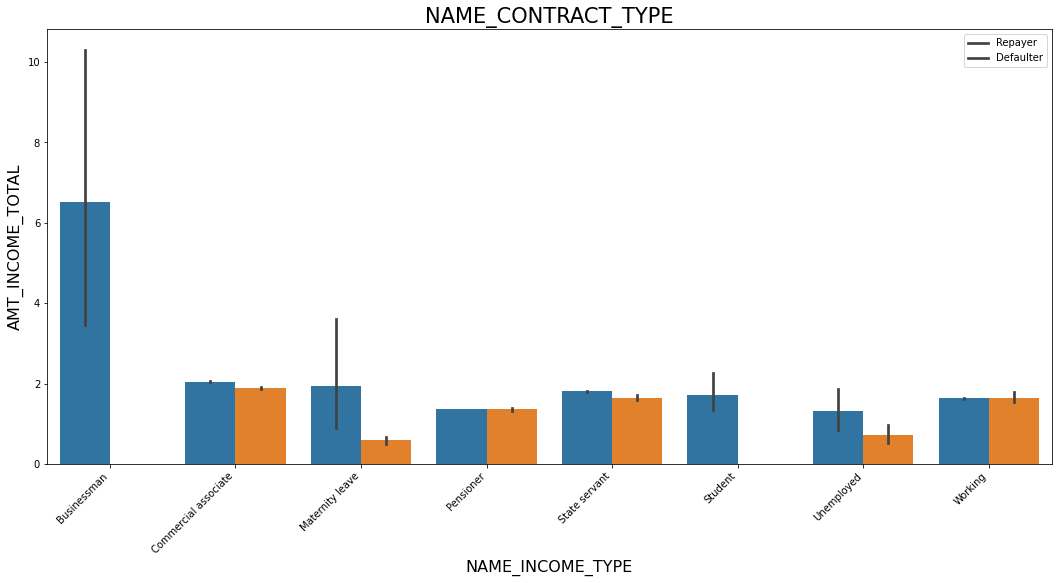

In [128]:
#Income type vs Income Amount On a seaborn barplot

bivariate_c('NAME_INCOME_TYPE','AMT_INCOME_TOTAL', app_data, 'TARGET', (18,8), ['Repayer','Defaulter'])

##### Inferences
* It can be seen that Businessman income is the highest and the estimated range with default 95% confidence level seem to indicate that the income of a Businessman could be in the range of slightly close to 4 lakhs and slightly above 10 lakhs

##### 6.3.3 Numeric Variables Analysis

Bisecting the app_data dataframe based on Target value 0 and 1 for correlation and other analysis

In [129]:
#Listing all the columns of dataframe 'app_data'

app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT

In [130]:
# bisecting the app_data dataframe based on Target value 0 and 1 for correlation and other analysis

cols_for_correlation = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 
                        'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
                        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
                        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 
                        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


# Repayers dataframe
Repayer_df = app_data.loc[app_data['TARGET']==0, cols_for_correlation]

# Defaulters dataframe
Defaulter_df = app_data.loc[app_data['TARGET']==1, cols_for_correlation]

In [131]:
len(cols_for_correlation)

41

Correlation between numeric variable

In [132]:
# Getting  top 10 correlation for the Repayers dataframe

corr_repayer = Repayer_df.corr()
corr_df_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df_repayer.columns =['VAR1','VAR2','Correlation']
corr_df_repayer.dropna(subset = ["Correlation"], inplace = True)
corr_df_repayer["Correlation"]=corr_df_repayer["Correlation"].abs() 
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True) 
corr_df_repayer.head(10)

,VAR1,VAR2,Correlation
64,AMT_GOODS_PRICE,AMT_CREDIT,0.987250
65,AMT_GOODS_PRICE,AMT_ANNUITY,0.776686
43,AMT_ANNUITY,AMT_CREDIT,0.771309
131,DAYS_EMPLOYED,DAYS_BIRTH,0.626114
42,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418953
63,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.349462
21,AMT_CREDIT,AMT_INCOME_TOTAL,0.342799
152,DAYS_REGISTRATION,DAYS_BIRTH,0.333151
174,DAYS_ID_PUBLISH,DAYS_EMPLOYED,0.276663
173,DAYS_ID_PUBLISH,DAYS_BIRTH,0.271314


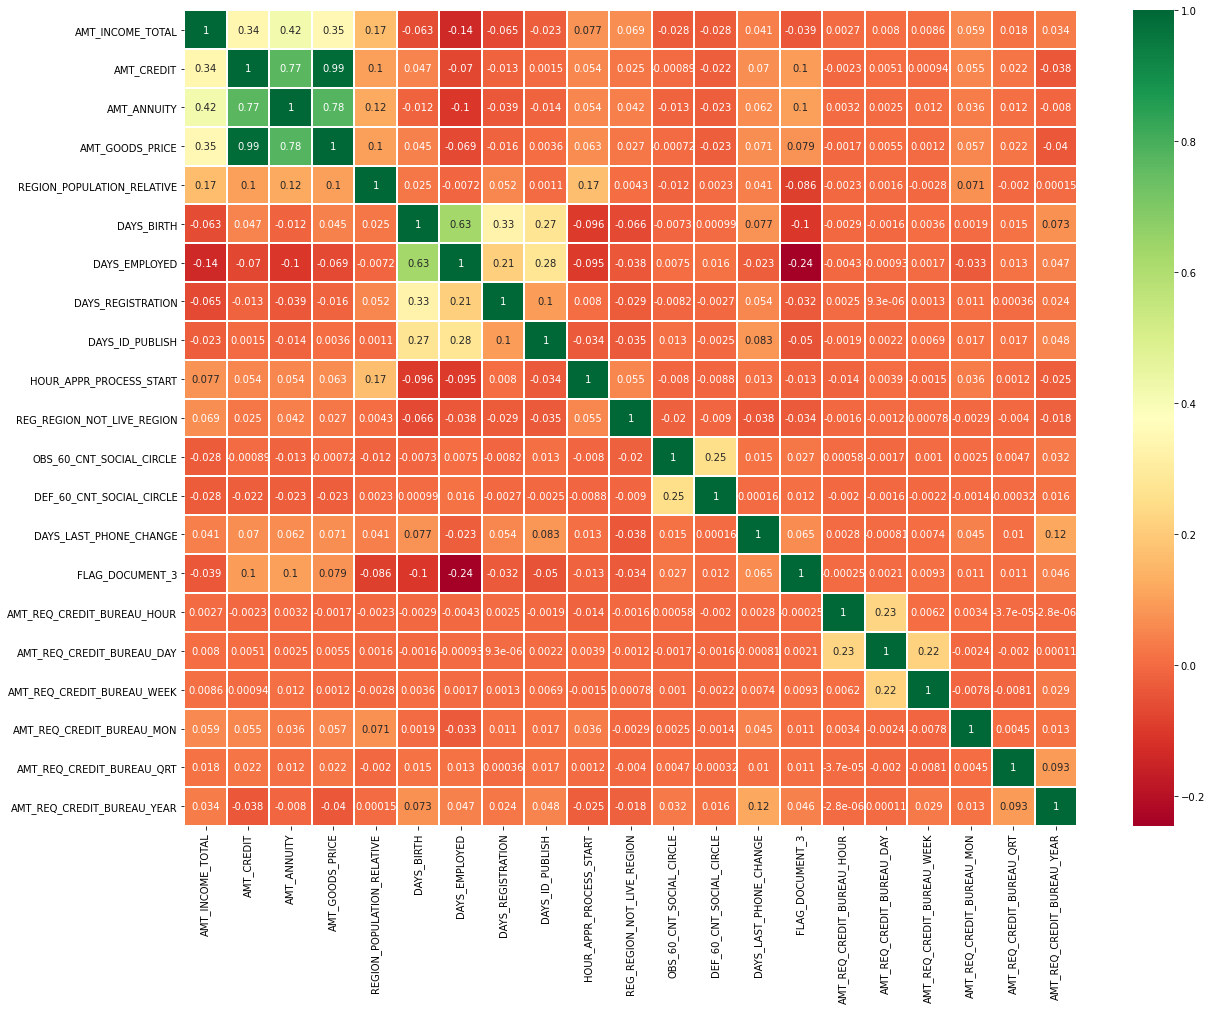

In [133]:
#plotting heatmap to see linear correlation amoung Repayers 

fig = plt.figure(figsize=(20,15))
ax = sns.heatmap(Repayer_df.corr(), cmap="RdYlGn",annot=True,linewidth =1)

##### Inferences:
Correlating factors amongst repayers

**1. Credit amount is highly correlated with:**
* Goods Price Amount
* Loan Annuity
* Total Income

**2. We can also see that repayers have high correlation in number of days employed.**

In [134]:
# Getting the top 10 correlation for the Defaulter data
corr_Defaulter = Defaulter_df.corr()
corr_Defaulter = corr_Defaulter.where(np.triu(np.ones(corr_Defaulter.shape),k=1).astype(np.bool))
corr_df_Defaulter = corr_Defaulter.unstack().reset_index()
corr_df_Defaulter.columns =['VAR1','VAR2','Correlation']
corr_df_Defaulter.dropna(subset = ["Correlation"], inplace = True)
corr_df_Defaulter["Correlation"]=corr_df_Defaulter["Correlation"].abs()
corr_df_Defaulter.sort_values(by='Correlation', ascending=False, inplace=True)
corr_df_Defaulter.head(10)

,VAR1,VAR2,Correlation
64,AMT_GOODS_PRICE,AMT_CREDIT,0.983103
65,AMT_GOODS_PRICE,AMT_ANNUITY,0.752699
43,AMT_ANNUITY,AMT_CREDIT,0.752195
131,DAYS_EMPLOYED,DAYS_BIRTH,0.582185
152,DAYS_REGISTRATION,DAYS_BIRTH,0.289114
300,FLAG_DOCUMENT_3,DAYS_EMPLOYED,0.272169
263,DEF_60_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,0.264159
173,DAYS_ID_PUBLISH,DAYS_BIRTH,0.252863
351,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,0.247511
174,DAYS_ID_PUBLISH,DAYS_EMPLOYED,0.229090


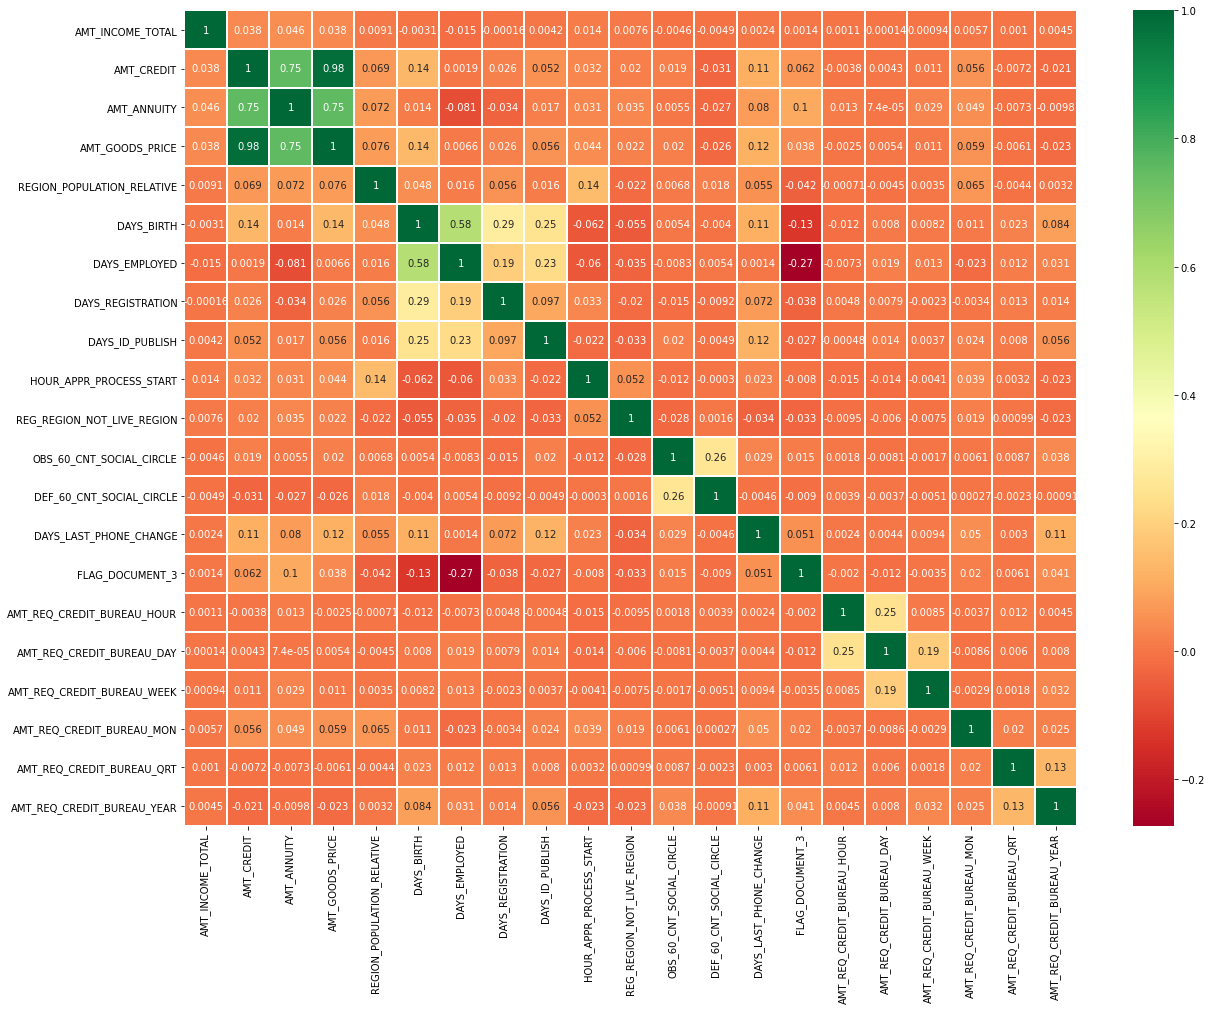

In [135]:
fig = plt.figure(figsize=(20,15))
ax = sns.heatmap(Defaulter_df.corr(), cmap="RdYlGn",annot=True,linewidth =1)

##### Inferences: Correlating factors amongst repayers
* Credit amount is highly correlated with good price amount which is same as repayers.
* Loan annuity correlation with credit amount has slightly reduced in defaulters(0.75) when compared to repayers(0.77)
* We can also see that repayers have high correlation in number of days employed(0.62) when compared to defaulters(0.58).
* There is a severe drop in the correlation between total income of the client and the credit amount(0.038) amongst defaulters whereas it is 0.342 among repayers.
* Days_birth and number of children correlation has reduced to 0.259 in defaulters when compared to 0.337 in repayers.
* There is a slight increase in defaulted to observed count in social circle among defaulters(0.264) when compared to repayers(0.254)

##### 6.3.4 Numerical Univariate Analysis

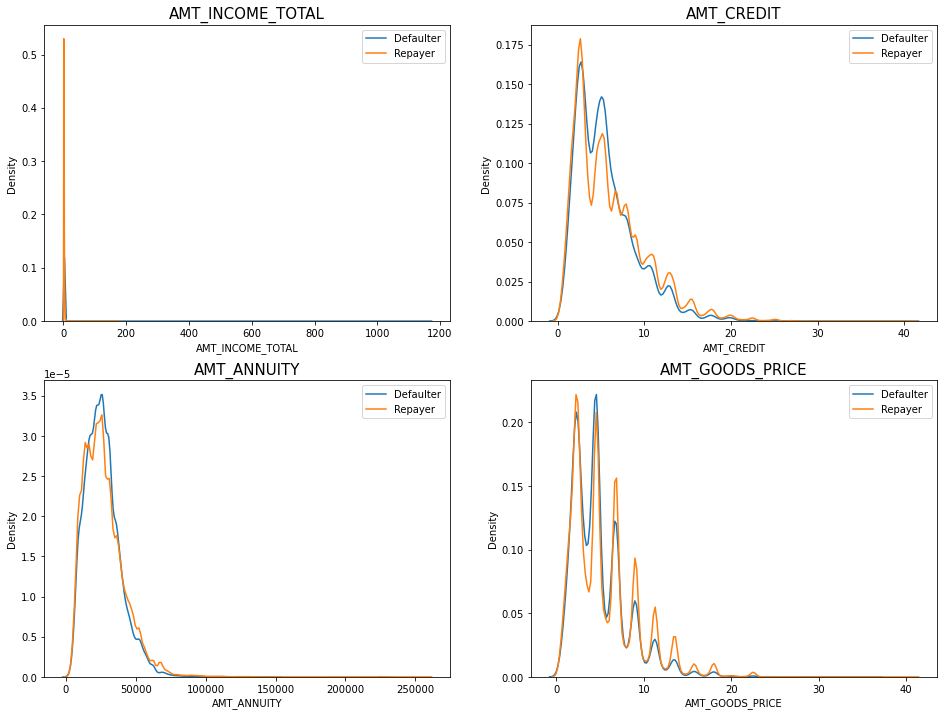

In [136]:
# Plotting the numerical columns related to amount as distribution plot to see density
amount = app_data[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']]

fig = plt.figure(figsize=(16,12))

for i in enumerate(amount):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(Defaulter_df[i[1]], hist=False,label ="Defaulter")
    sns.distplot(Repayer_df[i[1]], hist=False, label ="Repayer")
    plt.title(i[1], fontdict={'fontsize' : 15, 'fontweight' : 5})
    plt.legend()


plt.show()

##### Inferences:
* Most no of loans are given for goods price below 10 lakhs
* Most people pay annuity below 50K for the credit loan
* Credit amount of the loan is mostly less then 10 lakhs
* The repayers and defaulters distribution overlap in all the plots and hence we cannot use any of these variables in isolation to make a decision

##### 6.3.5 Numerical Bivariate Analysis

<Figure size 1152x1152 with 0 Axes>

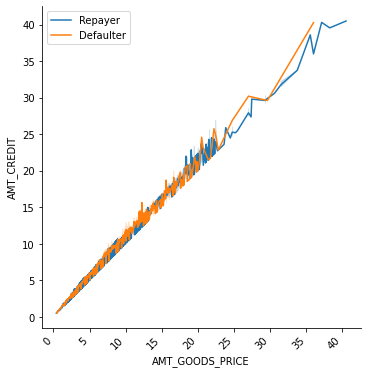

In [137]:
# Checking the relationship between Goods price and credit and comparing with loan repayment staus
bivariate_n('AMT_GOODS_PRICE','AMT_CREDIT',app_data,"TARGET", "line",['Repayer','Defaulter'])

##### Inferences:
* When the credit amount goes beyond 30 Lakhs, there is an increase in defaulters.

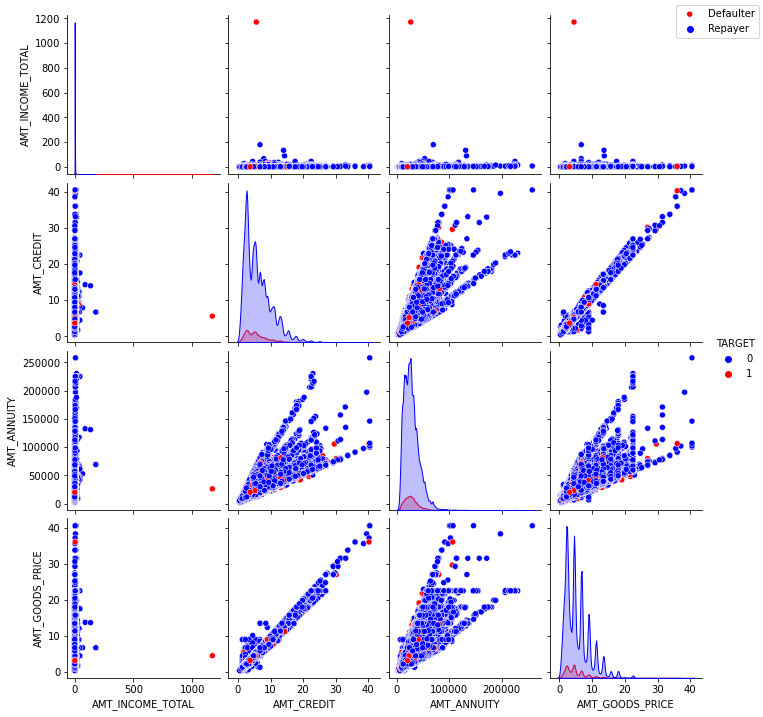

In [138]:
# Plotting pairplot between amount variable to draw reference against loan repayment status

amount = app_data[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE','TARGET']]
amount = amount[(amount["AMT_GOODS_PRICE"].notnull()) & (amount["AMT_ANNUITY"].notnull())]

ax= sns.pairplot(amount,hue="TARGET",palette=["b","r"])
ax.fig.legend(labels=['Defaulter','Repayer'])
plt.show()

##### Inferences:
* When Annuity Amount > 15K and Good Price Amount > 20 Lakhs, there is a lesser chance of defaulters
* Loan Amount(AMT_CREDIT) and Goods price(AMT_GOODS_PRICE) are highly correlated as based on the scatterplot where most of the data are consolidated in form of a line
* There are very less defaulters for AMT_CREDIT >20 Lakhs

# 7. Merged Dataframes Analysis

In [139]:
# merge both the dataframe on SK_ID_CURR with Inner Joins
loan_df = pd.merge(app_data, pre_app, how='inner', on='SK_ID_CURR')
loan_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AMT_GOODS_PRICE_RANGE,AGE,AGE_GROUP,YEARS_EMPLOYED,EMPLOYEMENT_YEARS,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,YEARLY_DECISION
0,100002,1,Cash loans,M,Y,0,2.025,4.065975,24700.5,3.510,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,1134.0,1,0.0,0.0,0.0,0.0,0.0,1.0,2L-3L,4L-5L,3L-4L,25.920548,25-30,1.745205,0-5,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,XAP,Approved,606,XNA,XAP,Unknown,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,565.0,125.0,25.0,17.0,0.0,2
1,100003,0,Cash loans,F,N,0,2.700,12.935025,35698.5,11.295,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,1,0.0,0.0,0.0,0.0,0.0,0.0,2L-3L,10L Above,NaN,45.931507,45-50,3.254795,0-5,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,XNA,Approved,746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,716.0,386.0,536.0,527.0,1.0,3
2,100003,0,Cash loans,F,N,0,2.700,12.935025,35698.5,11.295,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,1,0.0,0.0,0.0,0.0,0.0,0.0,2L-3L,10L Above,NaN,45.931507,45-50,3.254795,0-5,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,XAP,Approved,828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,365243.0,797.0,647.0,647.0,639.0,0.0,3
3,100003,0,Cash loans,F,N,0,2.700,12.935025,35698.5,11.295,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,1,0.0,0.0,0.0,0.0,0.0,0.0,2L-3L,10L Above,NaN,45.931507,45-50,3.254795,0-5,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,XAP,Approved,2341,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,365243.0,2310.0,1980.0,1980.0,1976.0,1.0,7
4,100004,0,Revolving loans,M,Y,0,0.675,1.350000,6750.0,1.350,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,815.0,0,0.0,0.0,0.0

In [140]:
#checking the details of the merged dataframe

loan_df.shape


(1413701, 82)

In [141]:
#checking the columns and column types of the dataframe
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 82 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1413701 non-null  int64   
 1   TARGET                       1413701 non-null  int64   
 2   NAME_CONTRACT_TYPE_x         1413701 non-null  category
 3   CODE_GENDER                  1413701 non-null  category
 4   FLAG_OWN_REALTY              1413701 non-null  category
 5   CNT_CHILDREN                 1413701 non-null  category
 6   AMT_INCOME_TOTAL             1413701 non-null  float64 
 7   AMT_CREDIT_x                 1413701 non-null  float64 
 8   AMT_ANNUITY_x                1413608 non-null  float64 
 9   AMT_GOODS_PRICE_x            1412493 non-null  float64 
 10  NAME_TYPE_SUITE_x            1410175 non-null  category
 11  NAME_INCOME_TYPE             1413701 non-null  category
 12  NAME_EDUCATION_TYPE         

In [142]:
# Bisecting the "loan_df" dataframe based on Target value 0 and 1 for correlation and other analysis

L0 = loan_df[loan_df['TARGET']==0] # Repayers
L1 = loan_df[loan_df['TARGET']==1] # Defaulters

**Plotting Contract Status vs purpose of the loan**

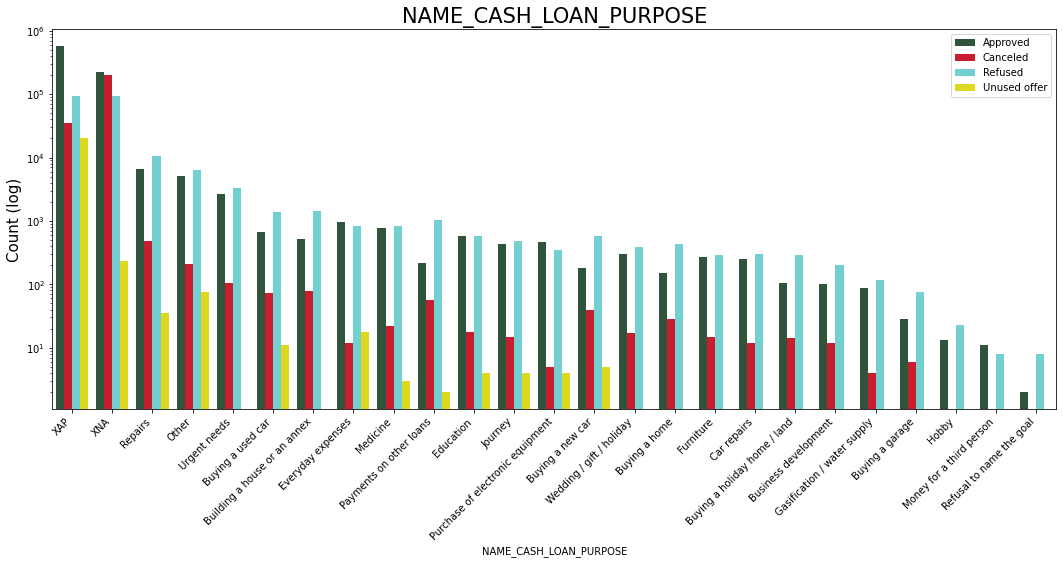

In [143]:
univariate_c_merged("NAME_CASH_LOAN_PURPOSE",L0,"NAME_CONTRACT_STATUS",["#295939","#e40017","#64dfdf","#fff600"],True,(18,7))

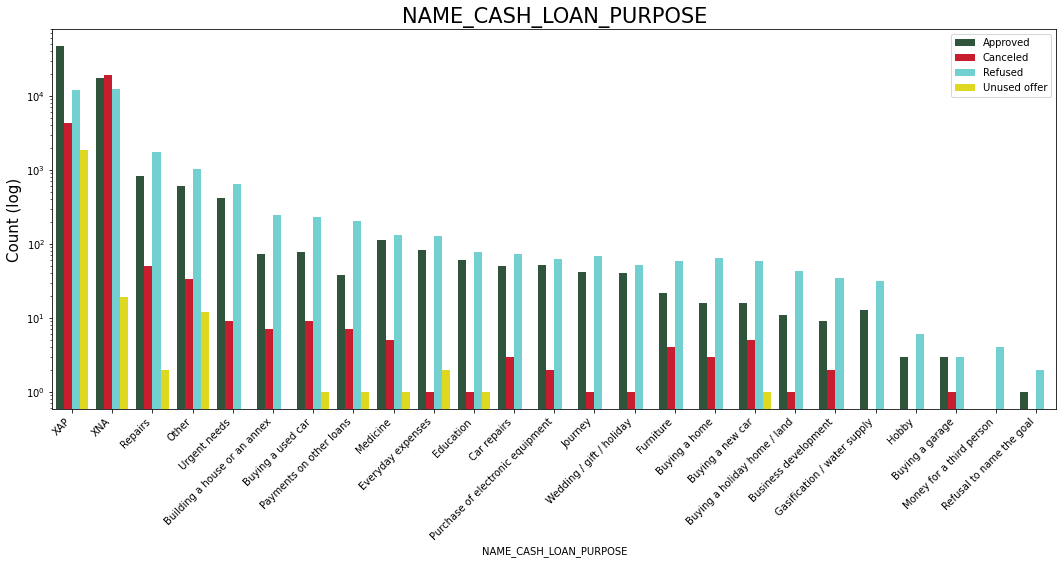

In [144]:
univariate_c_merged("NAME_CASH_LOAN_PURPOSE",L1,"NAME_CONTRACT_STATUS",["#295939","#e40017","#64dfdf","#fff600"],True,(18,7))

##### Inferences:
* Loan purpose has high number of unknown values (XAP, XNA)
* Loan taken for the purpose of Repairs looks to have highest default rate
* Huge number application have been rejected by bank or refused by client which are applied for Repair or Other. from this we can infer that repair is considered high risk by bank. Also, either they are rejected or bank offers loan on high interest rate which is not feasible by the clients and they refuse the loan.

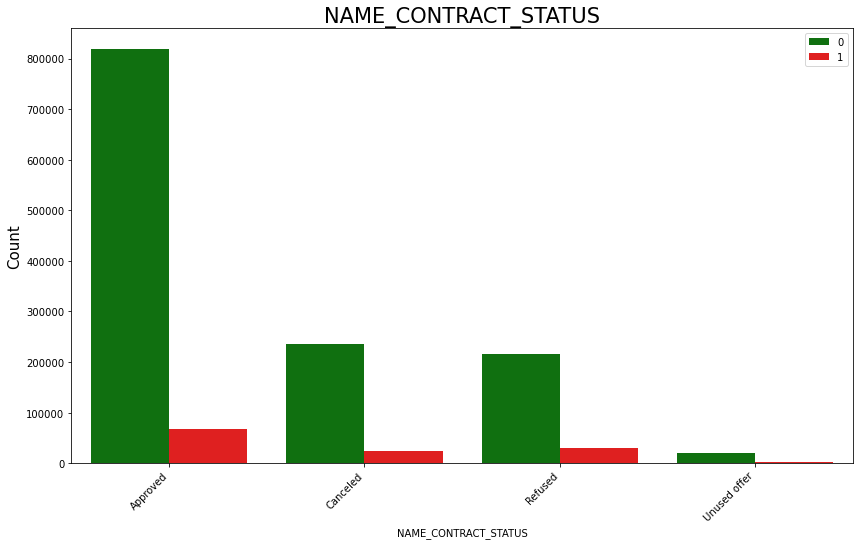

Counts Percentage
NAME_CONTRACT_STATUS TARGET                   
Approved             0       818856     92.41%
                     1        67243      7.59%
Canceled             0       235641     90.83%
                     1        23800      9.17%
Refused              0       215952      88.0%
                     1        29438      12.0%
Unused offer         0        20892     91.75%
                     1         1879      8.25%

In [145]:
# Checking Contract Status based on loan repayment status whether there is any business loss or financial loss

univariate_c_merged("NAME_CONTRACT_STATUS",loan_df,"TARGET",['g','r'],False,(14,8))
r = loan_df.groupby("NAME_CONTRACT_STATUS")["TARGET"]
df1 = pd.concat([r.value_counts(),round(r.value_counts(normalize=True).mul(100),2)],axis=1, keys=('Counts','Percentage'))
df1['Percentage'] = df1['Percentage'].astype(str) +"%" # adding percentage symbol in the results for understanding
df1

##### Inferences:
* 90% of the previously cancelled client have actually repayed the loan. Revising the interest rates would increase business opportunity for these clients
* 88% of the clients who have been previously refused a loan has payed back the loan in current case.
* Refusal reason should be recorded for further analysis as these clients could turn into potential repaying customer.

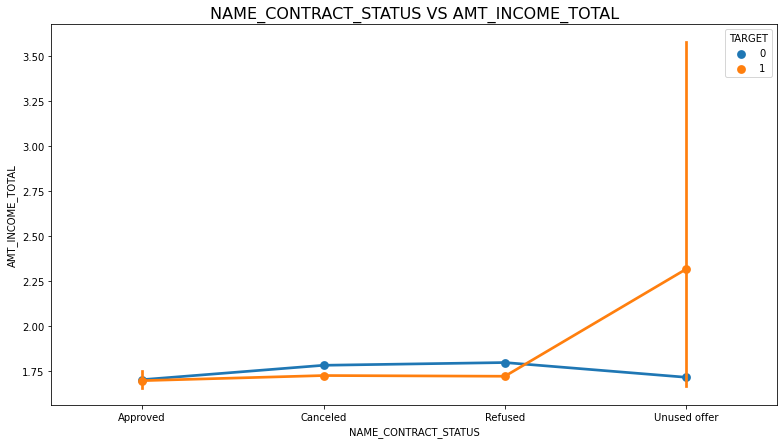

In [146]:
# plotting the relationship between income total and contact status

pointplot(loan_df,"TARGET","NAME_CONTRACT_STATUS",'AMT_INCOME_TOTAL')

##### Inferences:
* The point plot show that the people who have not used offer earlier have defaulted even when there average income is higher than others

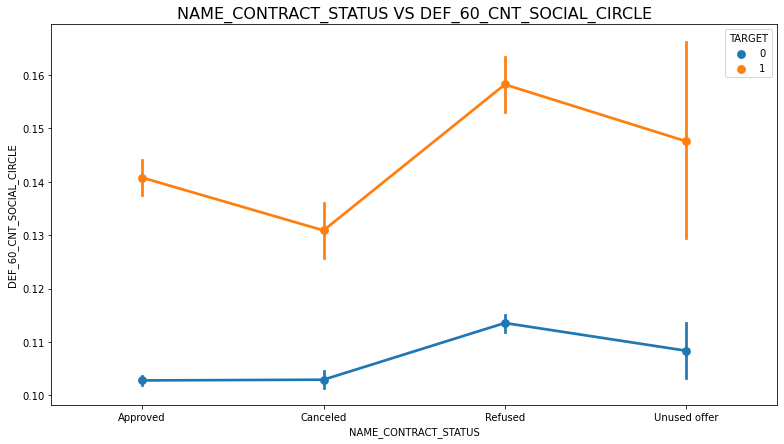

In [147]:
# plotting the relationship between people who defaulted in last 60 days being in client's social circle and contact status

pointplot(loan_df,"TARGET","NAME_CONTRACT_STATUS",'DEF_60_CNT_SOCIAL_CIRCLE')

##### Inferences:
* Clients who have average of 0.13 or higher their DEF_60_CNT_SOCIAL_CIRCLE score tend to default more and thus analysing client's social circle could help in disbursment of the loan.

**For Conclusion please refer our attached pdf (PPt or presentation part)** 

**Suggestions:**
* **90% of the previously cancelled client have actually repayed the loan. Record the reason for cancellation which might help the bank to determine and negotiate terms with these repaying customers in future for increase business opportunity.**
* **88% of the clients who were refused by bank for loan earlier have now turned into a repaying client. Hence documenting the reason for rejection could mitigate the business loss and these clients could be contacted for further loans.**